In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from collections import Counter
import pickle

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
test = pd.read_csv('test.csv')
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  
3         NaN       0      6    2010        WD         Normal  
4         NaN       0      1    2010        WD         Normal  

[5 rows x 80 columns]

# DATA CLEANING & EXPLORATORY DATA ANALYSIS

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [6]:
listItem = []
for col in train.columns :
    listItem.append([col, train[col].dtype, train[col].isna().sum(), round((train[col].isna().sum()/len(train[col])) * 100,2),
                    train[col].nunique(), list(train[col].unique()[:2])]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

dataFeatures dataType  null  nullPct  unique        uniqueSample
0              Id    int64     0     0.00    1460              [1, 2]
1      MSSubClass    int64     0     0.00      15            [60, 20]
2        MSZoning   object     0     0.00       5            [RL, RM]
3     LotFrontage  float64   259    17.74     110        [65.0, 80.0]
4         LotArea    int64     0     0.00    1073        [8450, 9600]
5          Street   object     0     0.00       2        [Pave, Grvl]
6           Alley   object  1369    93.77       2         [nan, Grvl]
7        LotShape   object     0     0.00       4          [Reg, IR1]
8     LandContour   object     0     0.00       4          [Lvl, Bnk]
9       Utilities   object     0     0.00       2    [AllPub, NoSeWa]
10      LotConfig   object     0     0.00       5       [Inside, FR2]
11      LandSlope   object     0     0.00       3          [Gtl, Mod]
12   Neighborhood   object     0     0.00      25  [CollgCr, Veenker]
13     Condition1   object     0     0.00       9       [Norm, Feedr]
14     Condition2   object     0     0.00       8      [Norm, Artery]
15       BldgType   object     0     0.00       5      [1Fam, 2fmCon]
16     HouseStyle   object     0     0.00       8    [2Story, 1Story]
17    OverallQual    int64     0     0.00      10              [7, 6]
18    OverallCond    int64     0     0.00       9              [5, 8]
19      YearBuilt    int64     0     0.00     112        [2003, 1976]
20   YearRemodAdd    int64     0     0.00      61        [2003, 1976]
21      RoofStyle   object     0     0.00       6        [Gable, Hip]
22       RoofMatl   object     0     0.00       8  [CompShg, WdShngl]
23    Exterior1st   object     0     0.00      15  [VinylSd, MetalSd]
24    Exterior2nd   object     0     0.00      16  [VinylSd, MetalSd]
25     MasVnrType   object     8     0.55       4     [BrkFace, None]
26     MasVnrArea  float64     8     0.55     327        [196.0, 0.0]
27      ExterQual   object     0     0.00       4            [Gd, TA]
28      ExterCond   object     0     0.00       5            [TA, Gd]
29     Foundation   object     0     0.00       6     [PConc, CBlock]
..            ...      ...   ...      ...     ...                 ...
51   BedroomAbvGr    int64     0     0.00       8              [3, 4]
52   KitchenAbvGr    int64     0     0.00       4              [1, 2]
53    KitchenQual   object     0     0.00       4            [Gd, TA]
54   TotRmsAbvGrd    int64     0     0.00      12              [8, 6]
55     Functional   object     0     0.00       7         [Typ, Min1]
56     Fireplaces    int64     0     0.00       4              [0, 1]
57    FireplaceQu   object   690    47.26       5           [nan, TA]
58     GarageType   object    81     5.55       6    [Attchd, Detchd]
59    GarageYrBlt  float64    81     5.55      97    [2003.0, 1976.0]
60   GarageFinish   object    81     5.55       3          [RFn, Unf]
61     GarageCars    int64     0     0.00       5              [2, 3]
62     GarageArea    int64     0     0.00     441          [548, 460]
63     GarageQual   object    81     5.55       5            [TA, Fa]
64     GarageCond   object    81     5.55       5            [TA, Fa]
65     PavedDrive   object     0     0.00       3              [Y, N]
66     WoodDeckSF    int64     0     0.00     274            [0, 298]
67    OpenPorchSF    int64     0     0.00     202             [61, 0]
68  EnclosedPorch    int64     0     0.00     120            [0, 272]
69      3SsnPorch    int64     0     0.00      20            [0, 320]
70    ScreenPorch    int64     0     0.00      76            [0, 176]
71       PoolArea    int64     0     0.00       8            [0, 512]
72         PoolQC   object  1453    99.52       3           [nan, Ex]
73          Fence   object  1179    80.75       4        [nan, MnPrv]
74    MiscFeature   object  1406    96.30       4         [nan, Shed]
75        MiscVal    int64     0     0.00      21            [0, 700]
76         MoSo

## Remove Outliers

In [7]:
def detect_outliers(df, n, features):
    """
    Takes a dataframe df of features and returns a list of indices
    correspoding to the observations containing more than n outliers according
    to the Turkey Method
    """
    outlier_id = []
    features_upper_outlier = []
    features_bottom_outlier = []
    
    # iterate over features
    for col in features:
        # first quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # third quartile (75%)
        Q3 = np.percentile(df[col], 75)
        
        IQR = Q3 - Q1
        
        # outlier step (Turkey Method)
        outlier_step = 1.5 * IQR
        features_upper_outlier.append(Q3 + outlier_step)
        features_bottom_outlier.append(Q1 - outlier_step)
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]['Id']
        
        outlier_id.extend(outlier_list_col)
        
    outlier_id_counter = Counter(outlier_id)
    multiple_outliers = list( k for k, v in outlier_id_counter.items() if v > n)
    
    return multiple_outliers

In [8]:
dfDesc[dfDesc['dataType'] == 'O']['dataFeatures'].values

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [9]:
basic_numerical_features = train.drop(['Id','SalePrice'], axis=1).select_dtypes(exclude=['object']).columns
outliers_to_drop = detect_outliers(train, 3, basic_numerical_features)

In [10]:
id_to_drop = train[(train['Id'].isin(outliers_to_drop))].Id.tolist()

In [11]:
train = train[~train['Id'].isin(id_to_drop)]

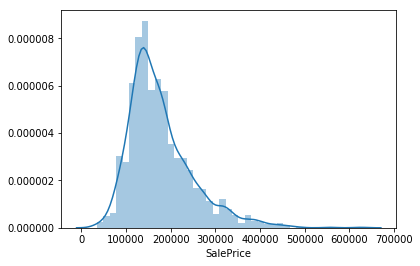

In [12]:
sns.distplot(train['SalePrice'])

In [13]:
df_numerical = train[dfDesc[(dfDesc['unique'] > 15) & ((dfDesc['dataType'] == 'int64') | (dfDesc['dataType'] == 'float64'))]['dataFeatures'].values]
len(df_numerical.columns)

23

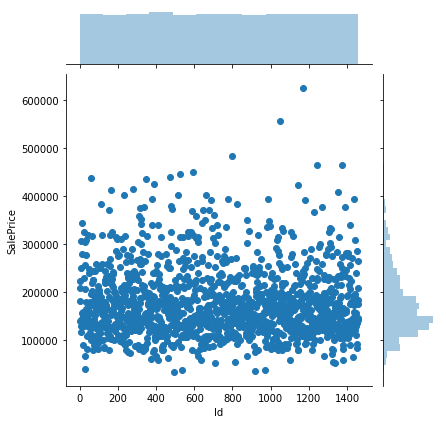

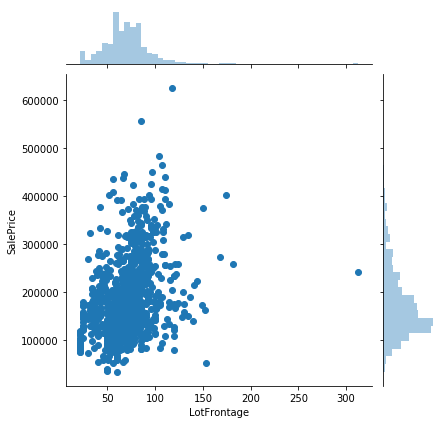

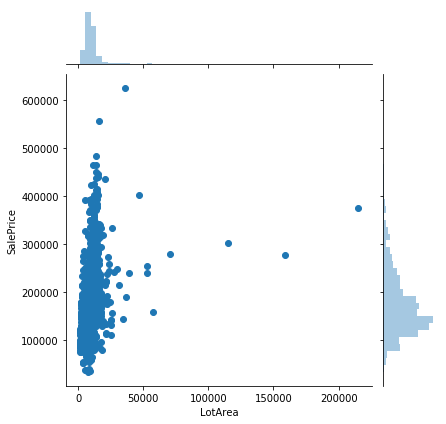

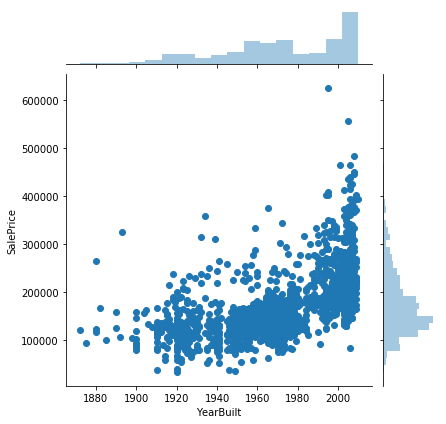

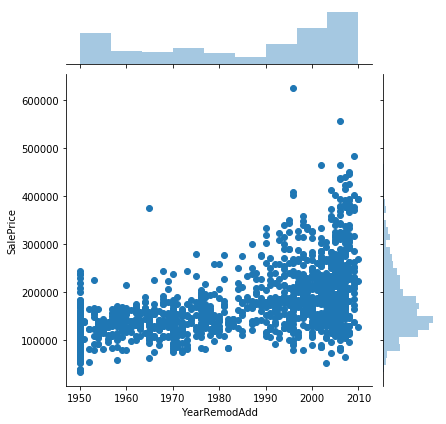

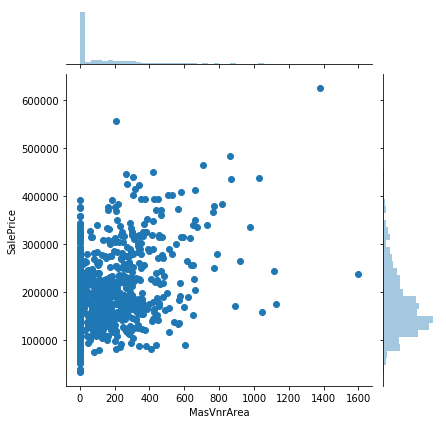

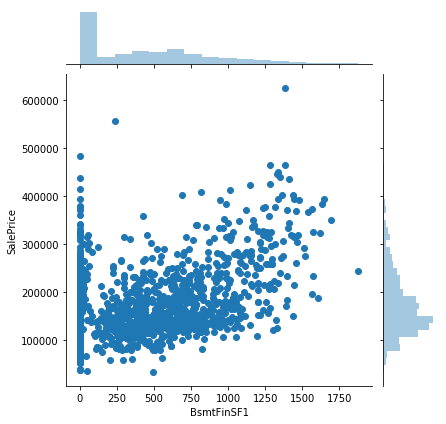

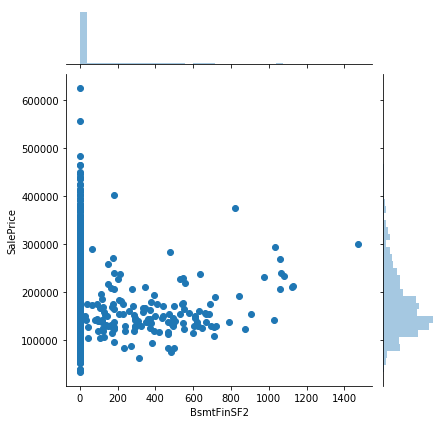

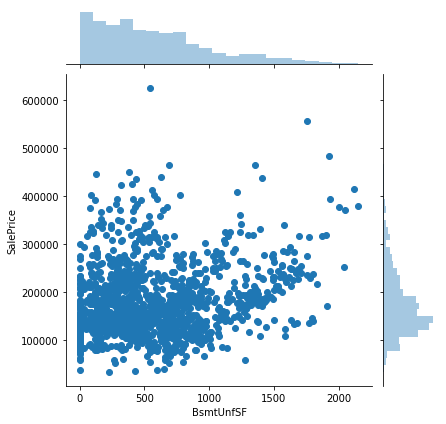

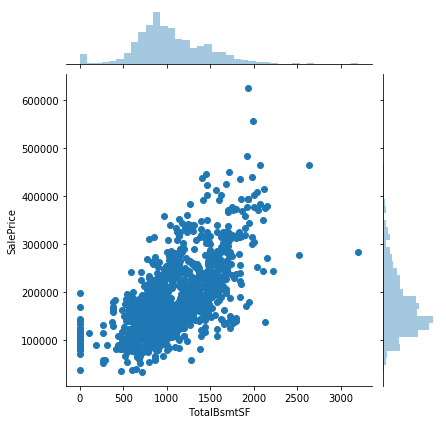

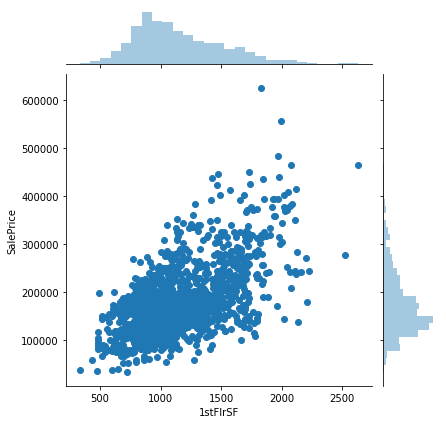

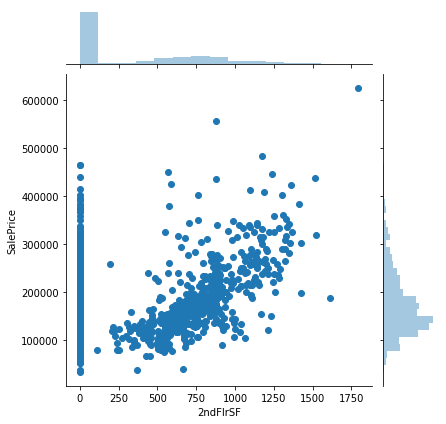

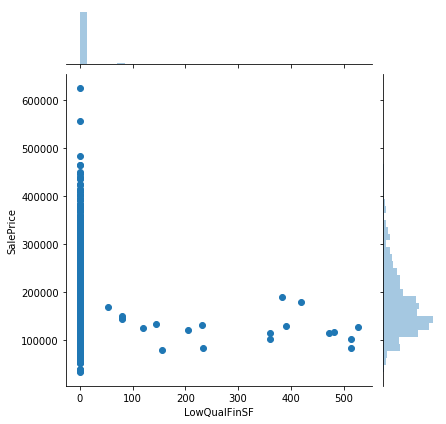

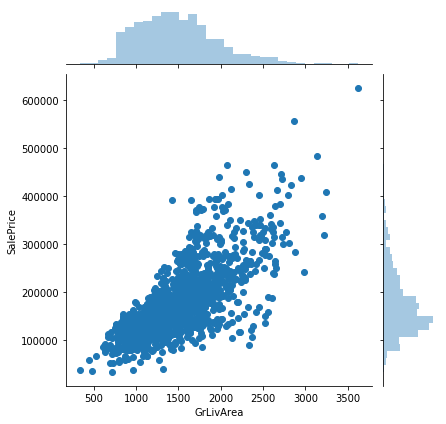

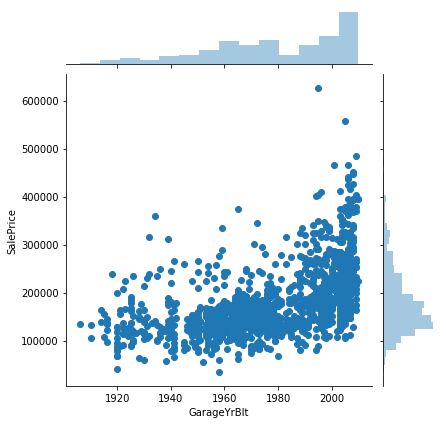

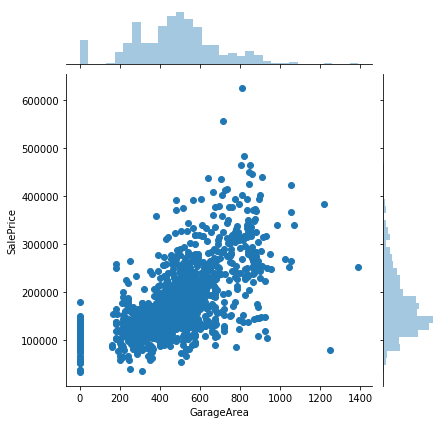

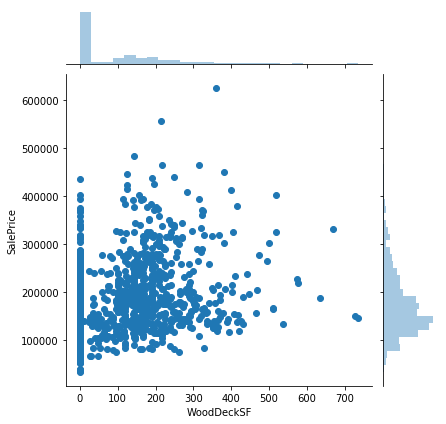

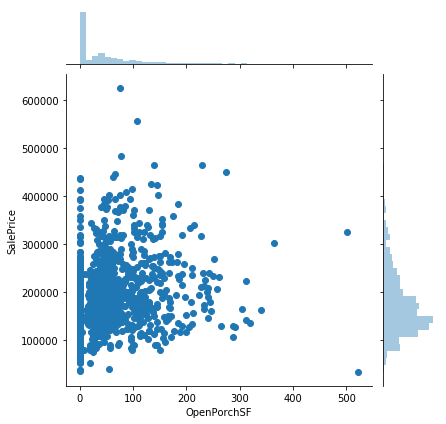

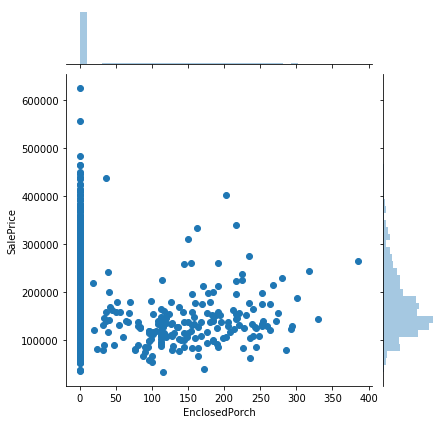

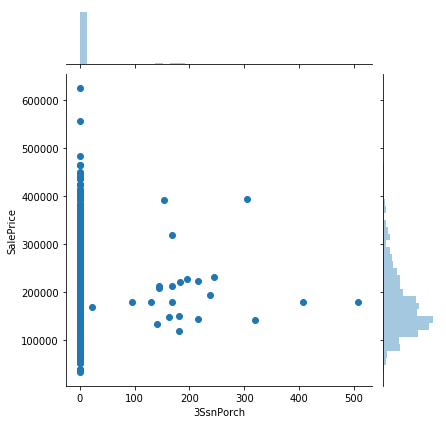

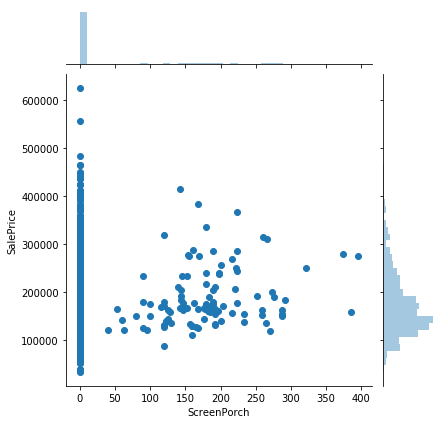

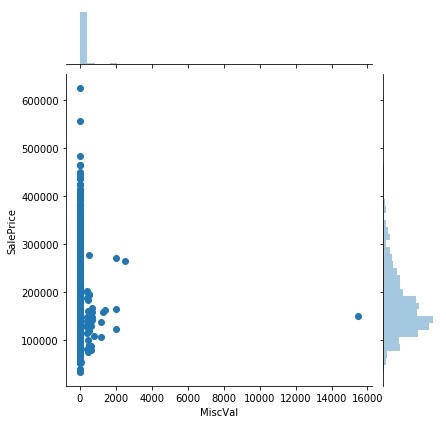

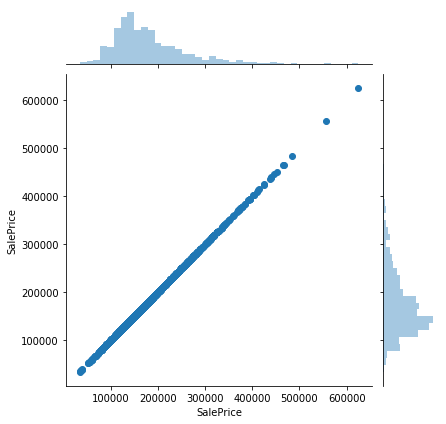

In [14]:
for col in df_numerical.columns:
    sns.jointplot(col,'SalePrice', data=train, kind='scatter')

In [15]:
df_ordinal = train[dfDesc[(dfDesc['unique'] <= 15) & ((dfDesc['dataType'] == 'int64') | (dfDesc['dataType'] == 'float64'))]['dataFeatures'].values]
len(df_ordinal.columns)

15

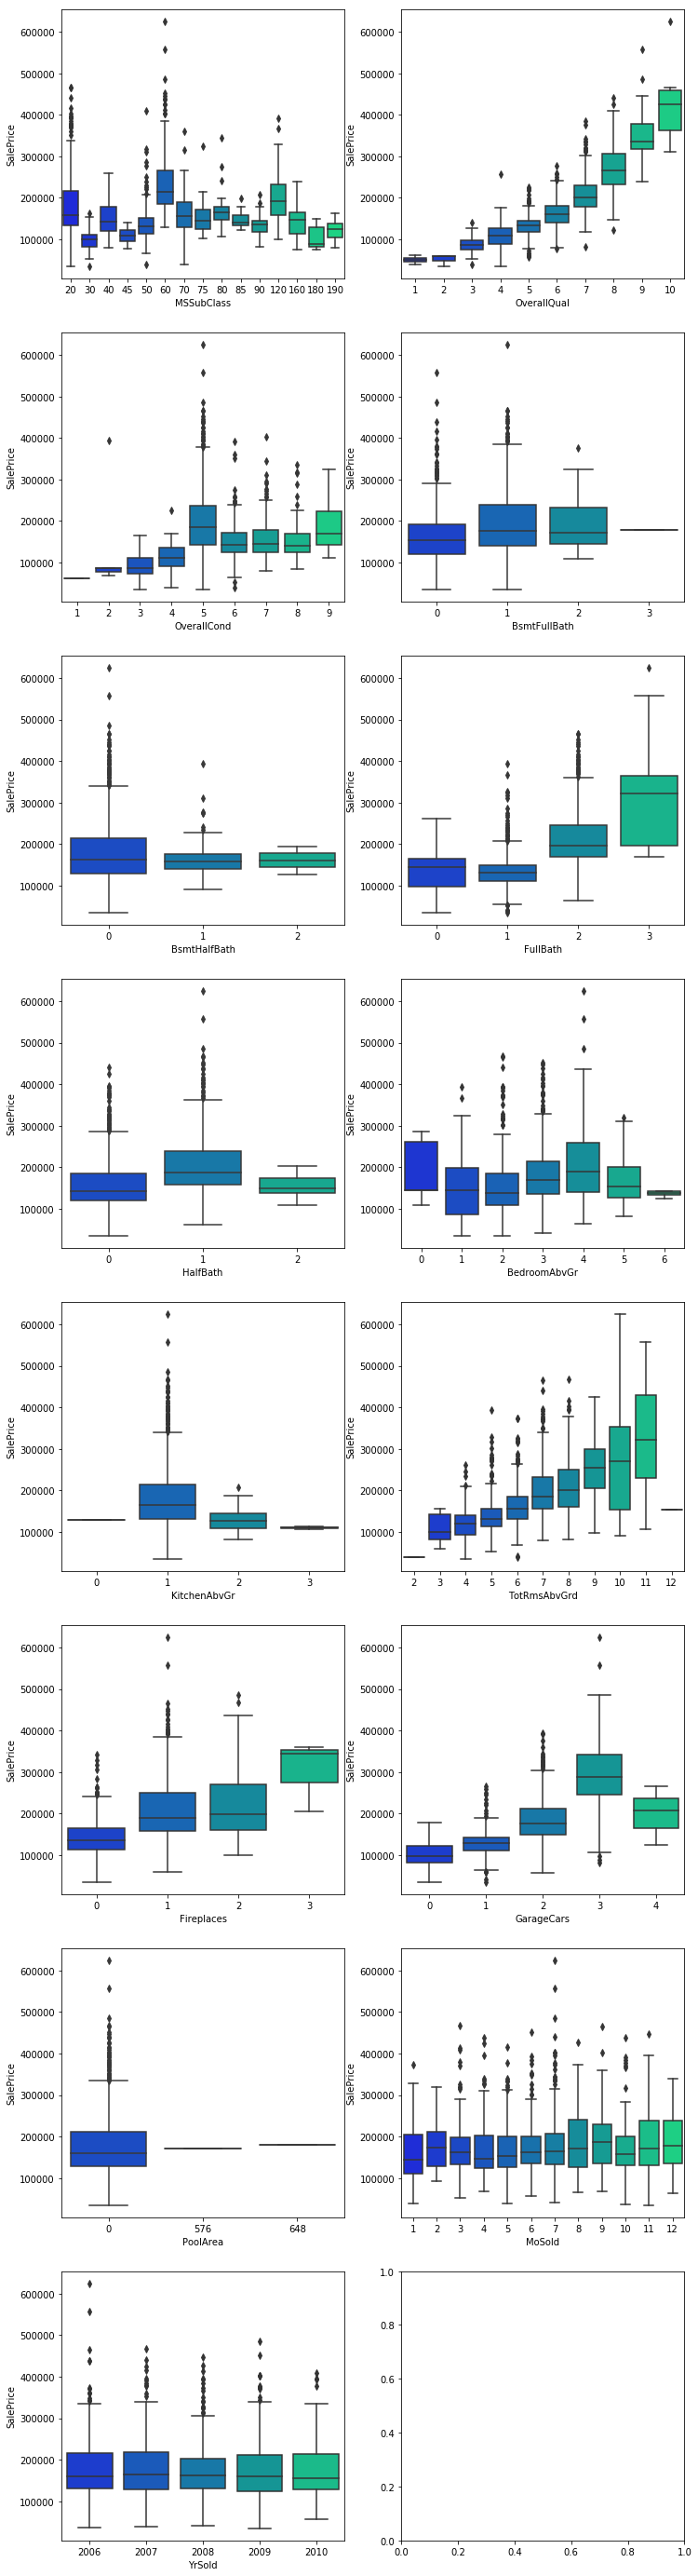

In [16]:
fig, axs = plt.subplots(8,2, figsize=(12,50))
columns = df_ordinal.columns
for col, num in zip(columns, range(1,len(columns)+1)):
    plt.subplot(8,2,num)
    sns.boxplot(col, 'SalePrice', data=train, palette='winter')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
plt.show()

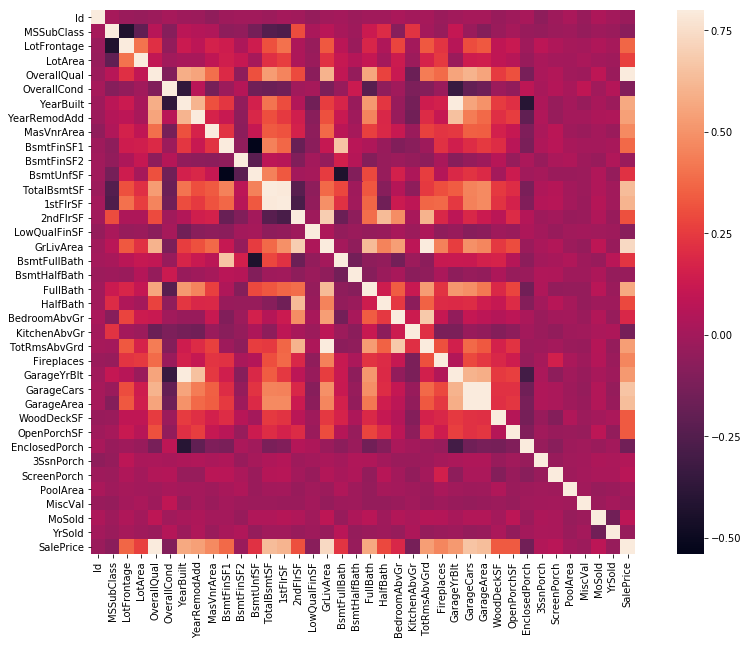

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), vmax=.8, square=True)

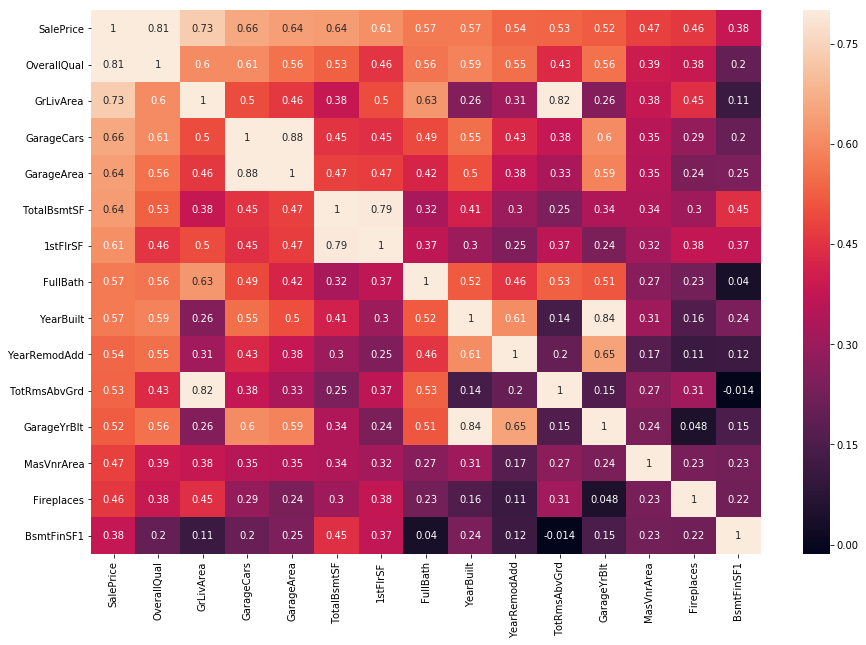

In [18]:
corr_matrix = train.corr()
cols = corr_matrix.nlargest(15, 'SalePrice')['SalePrice'].index
corr_mat = train[cols].corr()
plt.figure(figsize=(15,10))
# sns.set(font_scale=1.25)
sns.heatmap(corr_mat, annot=True, vmax=.8, cbar=True, yticklabels=cols.values, xticklabels=cols.values)

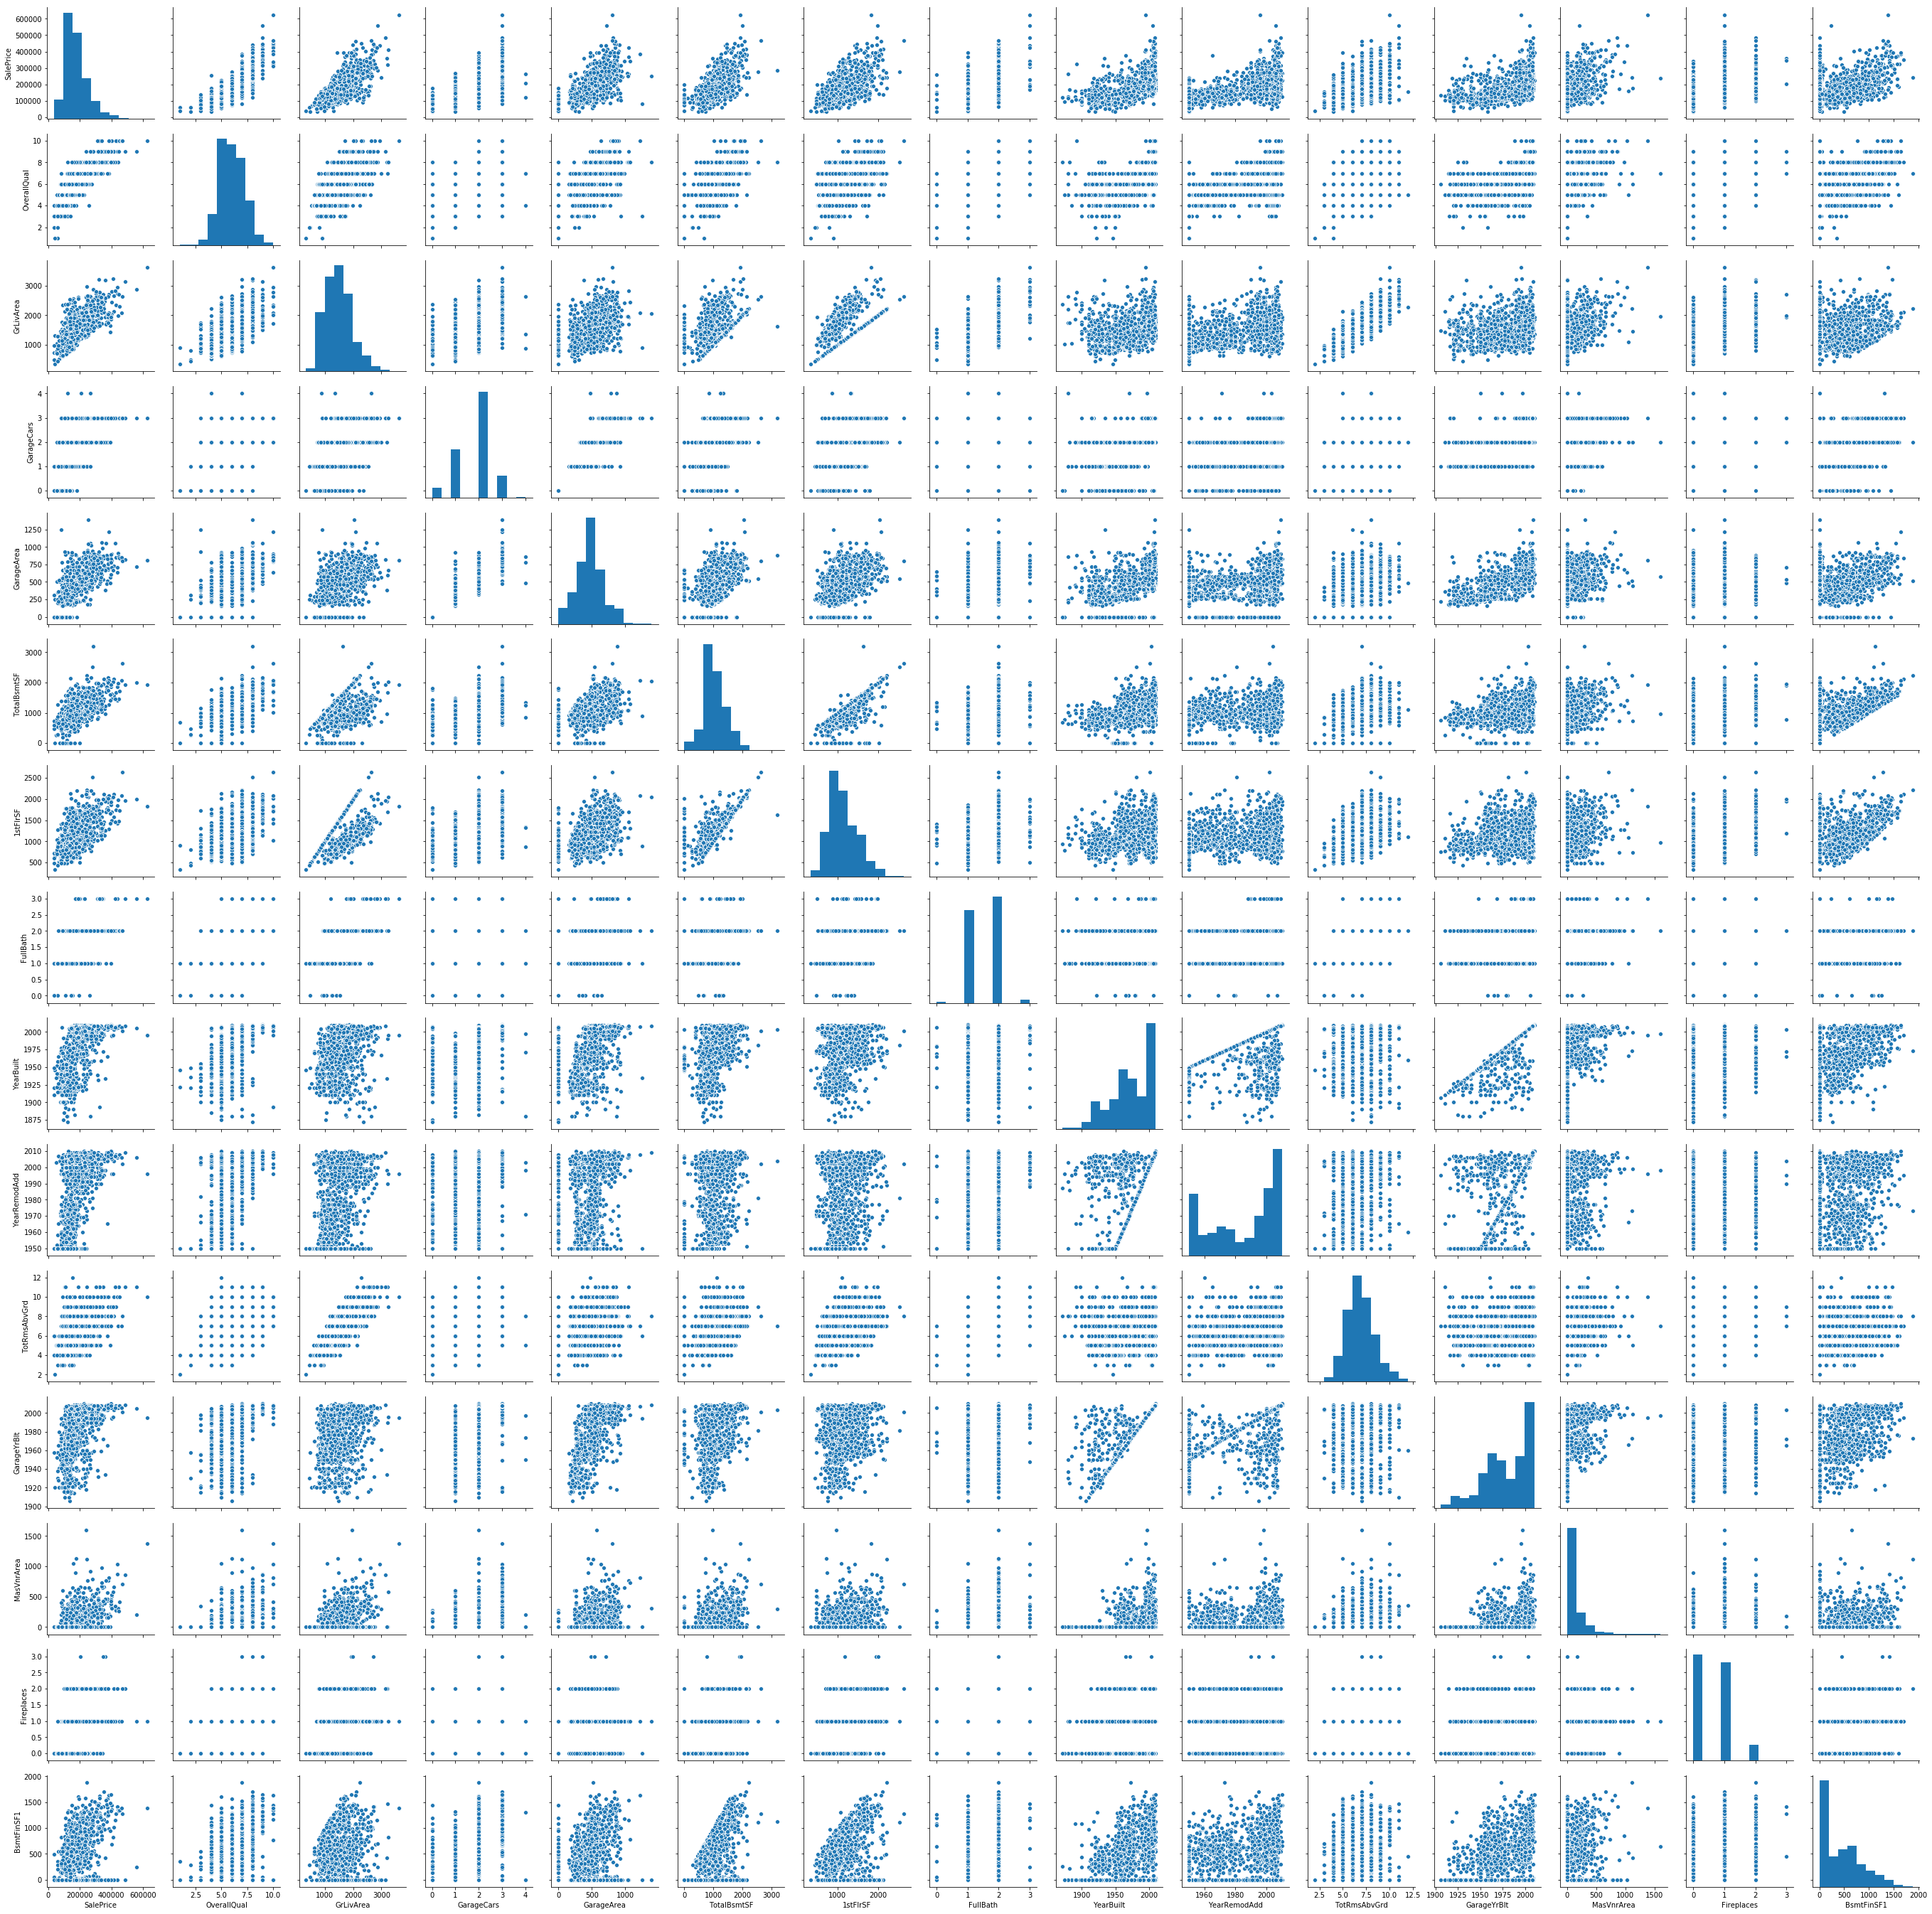

In [19]:
sns.pairplot(train[cols])

In [20]:
numerical_features = cols.tolist()

In [21]:
numerical_features.remove('SalePrice')
numerical_features.remove('GarageYrBlt')
numerical_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1']

## Missing Values

In [22]:
dfDesc[dfDesc['null'] > 0].sort_values('null', ascending=False)

dataFeatures dataType  null  nullPct  unique      uniqueSample
72        PoolQC   object  1453    99.52       3         [nan, Ex]
74   MiscFeature   object  1406    96.30       4       [nan, Shed]
6          Alley   object  1369    93.77       2       [nan, Grvl]
73         Fence   object  1179    80.75       4      [nan, MnPrv]
57   FireplaceQu   object   690    47.26       5         [nan, TA]
3    LotFrontage  float64   259    17.74     110      [65.0, 80.0]
58    GarageType   object    81     5.55       6  [Attchd, Detchd]
59   GarageYrBlt  float64    81     5.55      97  [2003.0, 1976.0]
60  GarageFinish   object    81     5.55       3        [RFn, Unf]
63    GarageQual   object    81     5.55       5          [TA, Fa]
64    GarageCond   object    81     5.55       5          [TA, Fa]
32  BsmtExposure   object    38     2.60       4          [No, Gd]
35  BsmtFinType2   object    38     2.60       6        [Unf, BLQ]
33  BsmtFinType1   object    37     2.53       6        [GLQ, ALQ]
31      BsmtCond   object    37     2.53       4          [TA, Gd]
30      BsmtQual   object    37     2.53       4          [Gd, TA]
26    MasVnrArea  float64     8     0.55     327      [196.0, 0.0]
25    MasVnrType   object     8     0.55       4   [BrkFace, None]
42    Electrical   object     1     0.07       5    [SBrkr, FuseF]

In [23]:
len(dfDesc[dfDesc['null'] > 0].sort_values('null', ascending=False)['dataFeatures'])

19

In [24]:
train = train.drop(['Id', 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageYrBlt',
                    'GarageType','GarageFinish','BsmtExposure','BsmtFinType2','BsmtFinType1'],axis=1)

In [25]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
for col in ['GarageQual','GarageCond','BsmtQual','BsmtCond','MasVnrType']:
    train[col] = train[col].fillna('None')

In [26]:
train = train.drop(train[train['Electrical'].isnull()].index)

In [27]:
train.isnull().sum().max()

0

In [28]:
listItem = []
for col in train.columns :
    listItem.append([col, train[col].dtype, train[col].isna().sum(), round((train[col].isna().sum()/len(train[col])) * 100,2),
                    train[col].nunique(), list(train[col].unique()[:2])]);

new_dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
new_dfDesc

dataFeatures dataType  null  nullPct  unique        uniqueSample
0      MSSubClass    int64     0      0.0      15            [60, 20]
1        MSZoning   object     0      0.0       5            [RL, RM]
2         LotArea    int64     0      0.0    1028        [8450, 9600]
3          Street   object     0      0.0       2        [Pave, Grvl]
4        LotShape   object     0      0.0       4          [Reg, IR1]
5     LandContour   object     0      0.0       4          [Lvl, Bnk]
6       Utilities   object     0      0.0       2    [AllPub, NoSeWa]
7       LotConfig   object     0      0.0       5       [Inside, FR2]
8       LandSlope   object     0      0.0       3          [Gtl, Mod]
9    Neighborhood   object     0      0.0      25  [CollgCr, Veenker]
10     Condition1   object     0      0.0       9       [Norm, Feedr]
11     Condition2   object     0      0.0       7      [Norm, Artery]
12       BldgType   object     0      0.0       5      [1Fam, 2fmCon]
13     HouseStyle   object     0      0.0       8    [2Story, 1Story]
14    OverallQual    int64     0      0.0      10              [7, 6]
15    OverallCond    int64     0      0.0       9              [5, 8]
16      YearBuilt    int64     0      0.0     112        [2003, 1976]
17   YearRemodAdd    int64     0      0.0      61        [2003, 1976]
18      RoofStyle   object     0      0.0       6        [Gable, Hip]
19       RoofMatl   object     0      0.0       7    [CompShg, Metal]
20    Exterior1st   object     0      0.0      15  [VinylSd, MetalSd]
21    Exterior2nd   object     0      0.0      16  [VinylSd, MetalSd]
22     MasVnrType   object     0      0.0       4     [BrkFace, None]
23     MasVnrArea  float64     0      0.0     316        [196.0, 0.0]
24      ExterQual   object     0      0.0       4            [Gd, TA]
25      ExterCond   object     0      0.0       5            [TA, Gd]
26     Foundation   object     0      0.0       6     [PConc, CBlock]
27       BsmtQual   object     0      0.0       5            [Gd, TA]
28       BsmtCond   object     0      0.0       5            [TA, Gd]
29     BsmtFinSF1    int64     0      0.0     613          [706, 978]
..            ...      ...   ...      ...     ...                 ...
38       2ndFlrSF    int64     0      0.0     390            [854, 0]
39   LowQualFinSF    int64     0      0.0      18            [0, 360]
40      GrLivArea    int64     0      0.0     827        [1710, 1262]
41   BsmtFullBath    int64     0      0.0       4              [1, 0]
42   BsmtHalfBath    int64     0      0.0       3              [0, 1]
43       FullBath    int64     0      0.0       4              [2, 1]
44       HalfBath    int64     0      0.0       3              [1, 0]
45   BedroomAbvGr    int64     0      0.0       7              [3, 4]
46   KitchenAbvGr    int64     0      0.0       4              [1, 2]
47    KitchenQual   object     0      0.0       4            [Gd, TA]
48   TotRmsAbvGrd    int64     0      0.0      11              [8, 6]
49     Functional   object     0      0.0       7         [Typ, Min1]
50     Fireplaces    int64     0      0.0       4              [0, 1]
51     GarageCars    int64     0      0.0       5              [2, 3]
52     GarageArea    int64     0      0.0     425          [548, 460]
53     GarageQual   object     0      0.0       6            [TA, Fa]
54     GarageCond   object     0      0.0       6            [TA, Fa]
55     PavedDrive   object     0      0.0       3              [Y, N]
56     WoodDeckSF    int64     0      0.0     259            [0, 298]
57    OpenPorchSF    int64     0      0.0     189             [61, 0]
58  EnclosedPorch    int64     0      0.0     113            [0, 272]
59      3SsnPorch    int64     0      0.0      19            [0, 320]
60    ScreenPorch    int64     0      0.0      67            [0, 176]
61       PoolArea    int64     0      0.0       3            [0, 648]
62        MiscVal    int64     0      0.0      17            [0, 700]
63         MoSo

## Encoding Categorical Variables

In [29]:
new_dfDesc[new_dfDesc['dataType'] == 'O'].sort_values('unique')

dataFeatures dataType  null  nullPct  unique        uniqueSample
3          Street   object     0      0.0       2        [Pave, Grvl]
6       Utilities   object     0      0.0       2    [AllPub, NoSeWa]
35     CentralAir   object     0      0.0       2              [Y, N]
55     PavedDrive   object     0      0.0       3              [Y, N]
8       LandSlope   object     0      0.0       3          [Gtl, Mod]
22     MasVnrType   object     0      0.0       4     [BrkFace, None]
4        LotShape   object     0      0.0       4          [Reg, IR1]
5     LandContour   object     0      0.0       4          [Lvl, Bnk]
47    KitchenQual   object     0      0.0       4            [Gd, TA]
24      ExterQual   object     0      0.0       4            [Gd, TA]
36     Electrical   object     0      0.0       5      [SBrkr, FuseF]
34      HeatingQC   object     0      0.0       5            [Ex, Gd]
28       BsmtCond   object     0      0.0       5            [TA, Gd]
27       BsmtQual   object     0      0.0       5            [Gd, TA]
25      ExterCond   object     0      0.0       5            [TA, Gd]
1        MSZoning   object     0      0.0       5            [RL, RM]
7       LotConfig   object     0      0.0       5       [Inside, FR2]
12       BldgType   object     0      0.0       5      [1Fam, 2fmCon]
66  SaleCondition   object     0      0.0       6   [Normal, Abnorml]
54     GarageCond   object     0      0.0       6            [TA, Fa]
26     Foundation   object     0      0.0       6     [PConc, CBlock]
18      RoofStyle   object     0      0.0       6        [Gable, Hip]
53     GarageQual   object     0      0.0       6            [TA, Fa]
33        Heating   object     0      0.0       6        [GasA, GasW]
49     Functional   object     0      0.0       7         [Typ, Min1]
11     Condition2   object     0      0.0       7      [Norm, Artery]
19       RoofMatl   object     0      0.0       7    [CompShg, Metal]
13     HouseStyle   object     0      0.0       8    [2Story, 1Story]
10     Condition1   object     0      0.0       9       [Norm, Feedr]
65       SaleType   object     0      0.0       9           [WD, New]
20    Exterior1st   object     0      0.0      15  [VinylSd, MetalSd]
21    Exterior2nd   object     0      0.0      16  [VinylSd, MetalSd]
9    Neighborhood   object     0      0.0      25  [CollgCr, Veenker]

In [30]:
ordinal_features = ['KitchenQual','ExterQual','BsmtQual','BsmtCond','HeatingQC','ExterCond',
                    'GarageQual','GarageCond']

In [31]:
cat_features = new_dfDesc[new_dfDesc['dataType'] == 'O']['dataFeatures']

In [32]:
cat_features = cat_features[~cat_features.isin(ordinal_features)].values

In [33]:
train[ordinal_features].head()

KitchenQual ExterQual BsmtQual BsmtCond HeatingQC ExterCond GarageQual  \
0          Gd        Gd       Gd       TA        Ex        TA         TA   
1          TA        TA       Gd       TA        Ex        TA         TA   
2          Gd        Gd       Gd       TA        Ex        TA         TA   
3          Gd        TA       TA       Gd        Gd        TA         TA   
4          Gd        Gd       Gd       TA        Ex        TA         TA   

  GarageCond  
0         TA  
1         TA  
2         TA  
3         TA  
4         TA

### -- Label Encoder--

In [34]:
from sklearn.preprocessing import LabelEncoder

le_kitchenQual = LabelEncoder()
le_exterQual = LabelEncoder()
le_bsmtQual = LabelEncoder()
le_bsmtCond = LabelEncoder()
le_heatingQC = LabelEncoder()
le_exterCond = LabelEncoder()
le_garageQual = LabelEncoder()
le_garageCond = LabelEncoder()

In [35]:
le_bsmtCond.fit(train['BsmtCond'])
le_bsmtQual.fit(train['BsmtQual'])
le_exterCond.fit(train['ExterCond'])
le_exterQual.fit(train['ExterQual'])
le_garageCond.fit(train['GarageCond'])
le_garageQual.fit(train['GarageQual'])
le_heatingQC.fit(train['HeatingQC'])
le_kitchenQual.fit(train['KitchenQual'])

LabelEncoder()

In [36]:
pickle.dump(le_bsmtCond, open('le_BsmtCond.sav', 'wb'))
pickle.dump(le_bsmtQual, open('le_BsmtQual.sav', 'wb'))
pickle.dump(le_exterCond, open('le_ExterCond.sav', 'wb'))
pickle.dump(le_exterQual, open('le_ExterQual.sav', 'wb'))
pickle.dump(le_garageCond, open('le_GarageCond.sav', 'wb'))
pickle.dump(le_garageQual, open('le_GarageQual.sav', 'wb'))
pickle.dump(le_heatingQC, open('le_HeatingQC.sav', 'wb'))
pickle.dump(le_kitchenQual, open('le_KitchenQual.sav', 'wb'))

In [37]:
train['BsmtCond'] = le_bsmtCond.transform(train['BsmtCond'])
train['BsmtQual'] = le_bsmtQual.transform(train['BsmtQual'])
train['ExterCond'] = le_exterCond.transform(train['ExterCond'])
train['ExterQual'] = le_exterQual.transform(train['ExterQual'])
train['GarageCond'] = le_garageCond.transform(train['GarageCond'])
train['GarageQual'] = le_garageQual.transform(train['GarageQual'])
train['HeatingQC'] = le_heatingQC.transform(train['HeatingQC'])
train['KitchenQual'] = le_kitchenQual.transform(train['KitchenQual'])

### --One Hot Encoding--

In [38]:
new_train = pd.get_dummies(train, columns=cat_features)
new_train.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   MasVnrArea  ExterQual  ExterCond  BsmtQual          ...            \
0       196.0          2          4         2          ...             
1         0.0          3          4         2          ...             
2       162.0          2          4         2          ...             
3         0.0          3          4         4          ...             
4       350.0          2          4         2          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 214 columns]

In [39]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 1459
Columns: 214 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(1), int32(8), int64(34), uint8(171)
memory usage: 674.2 KB


In [40]:
cols = []
col = []
for col1 in cat_features:
    for col2 in new_train.columns:
        if col1.lower() in col2.lower():
            col.append(col2)
    if len(col) > 0:
        cols.append(col)
        col = []

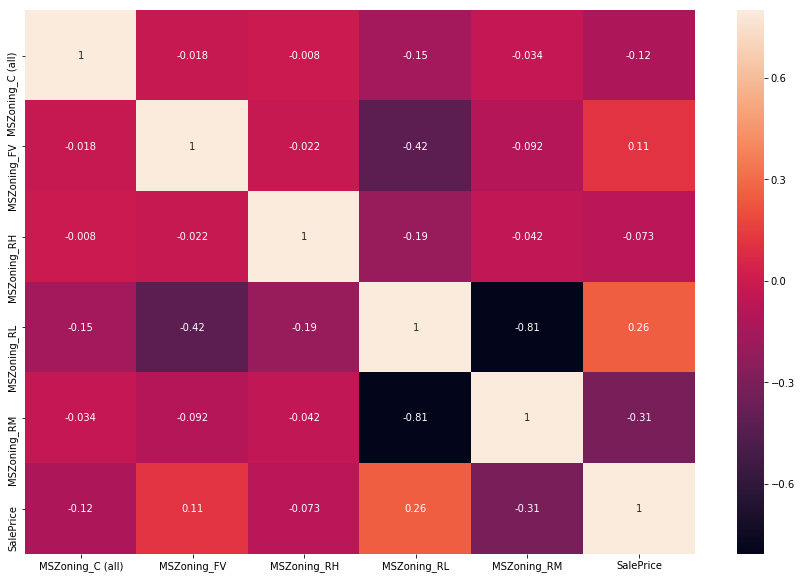

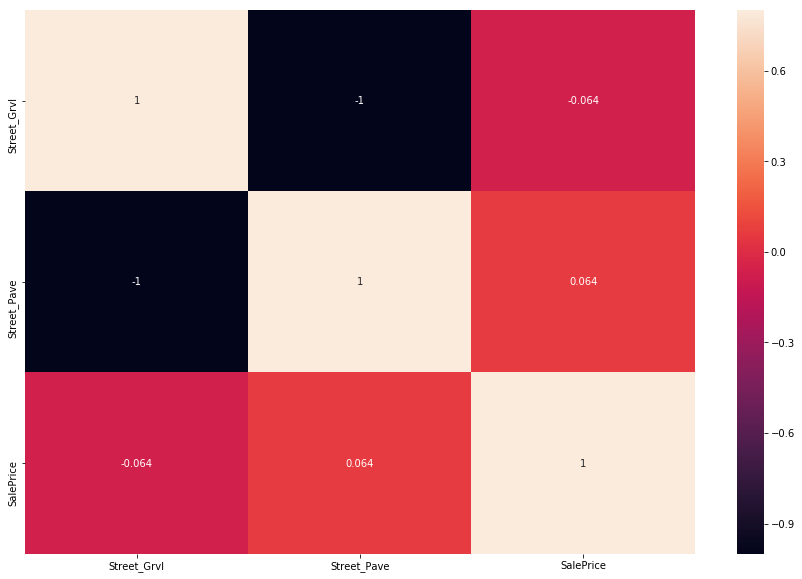

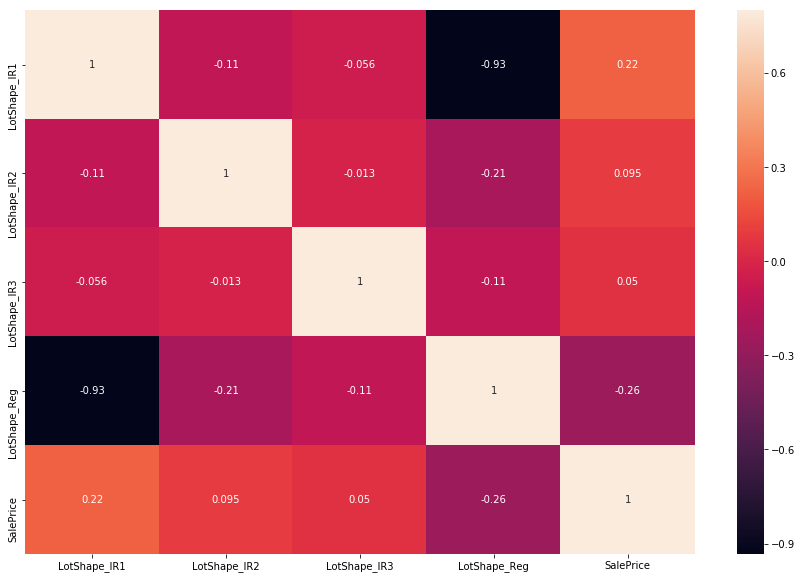

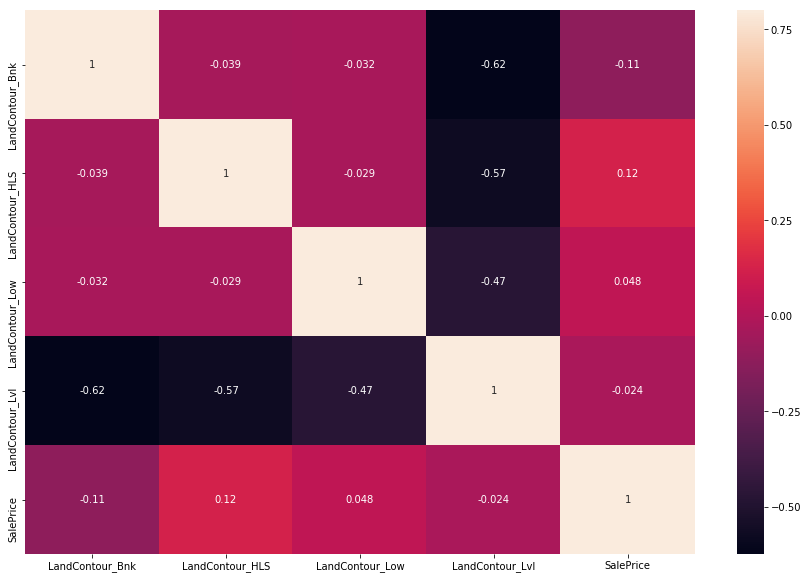

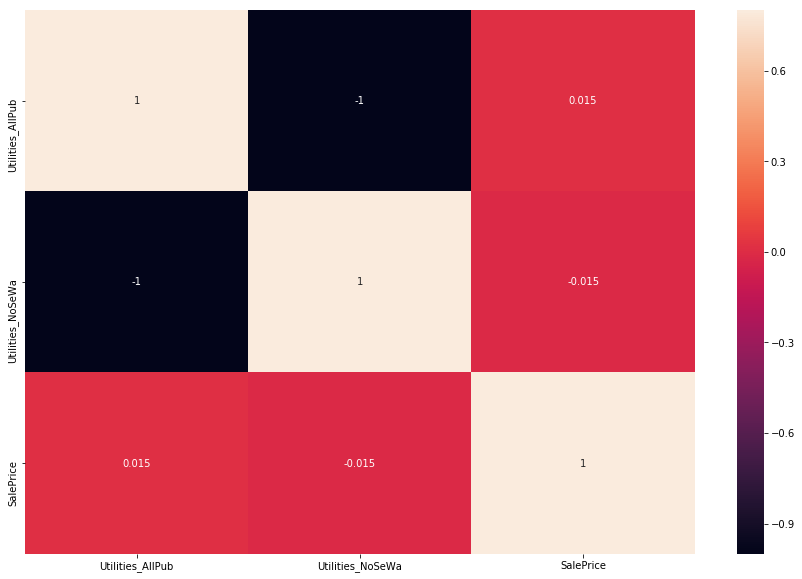

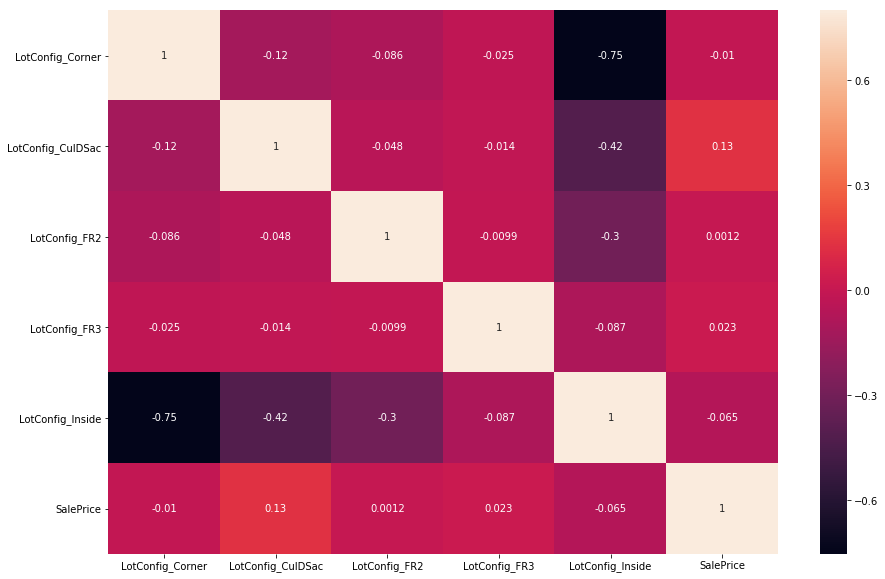

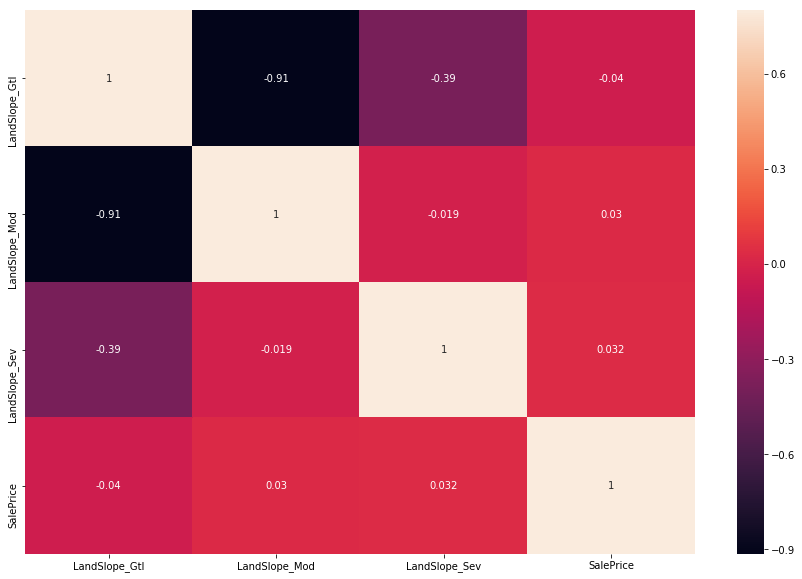

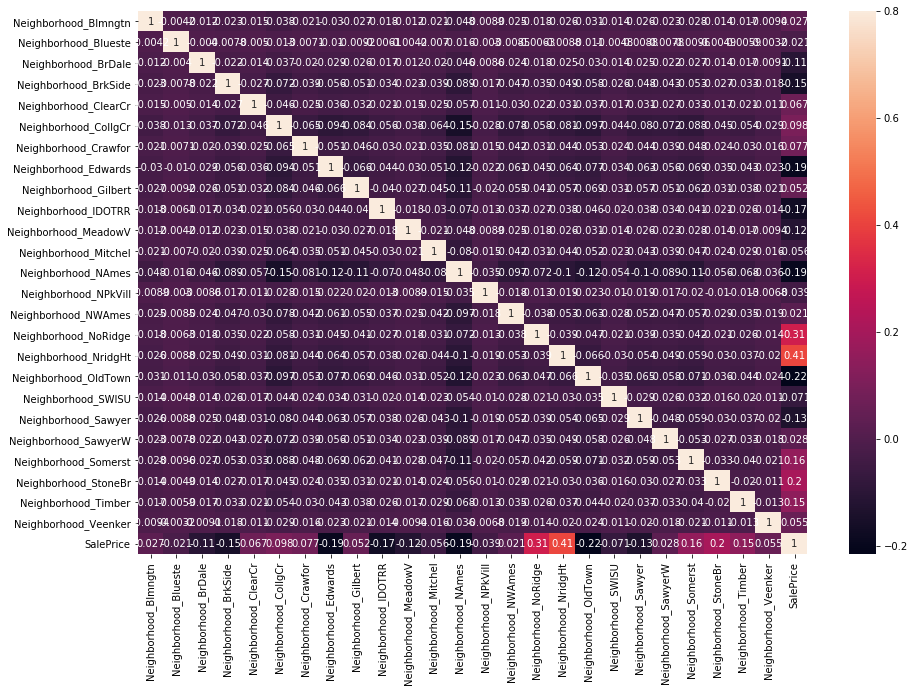

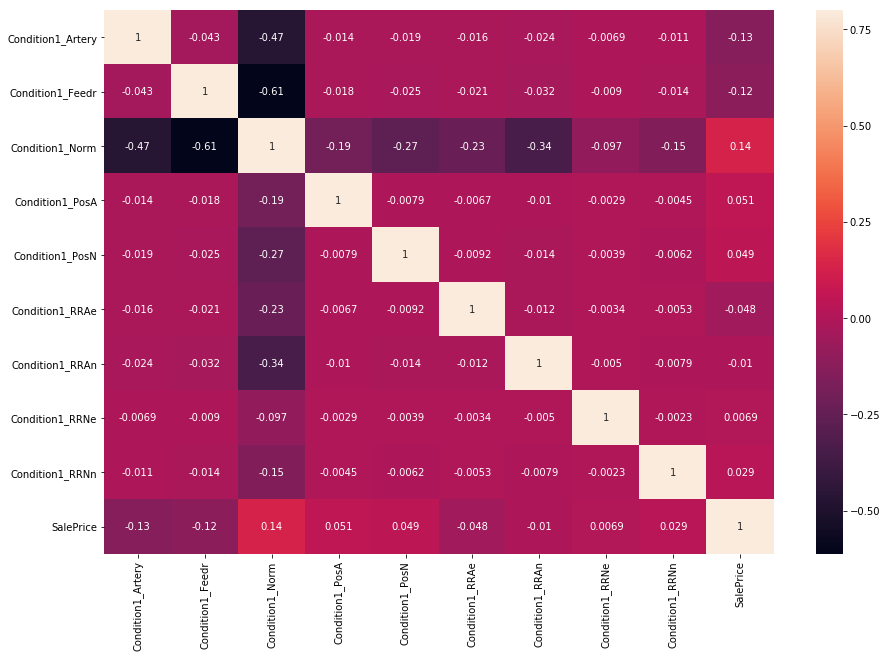

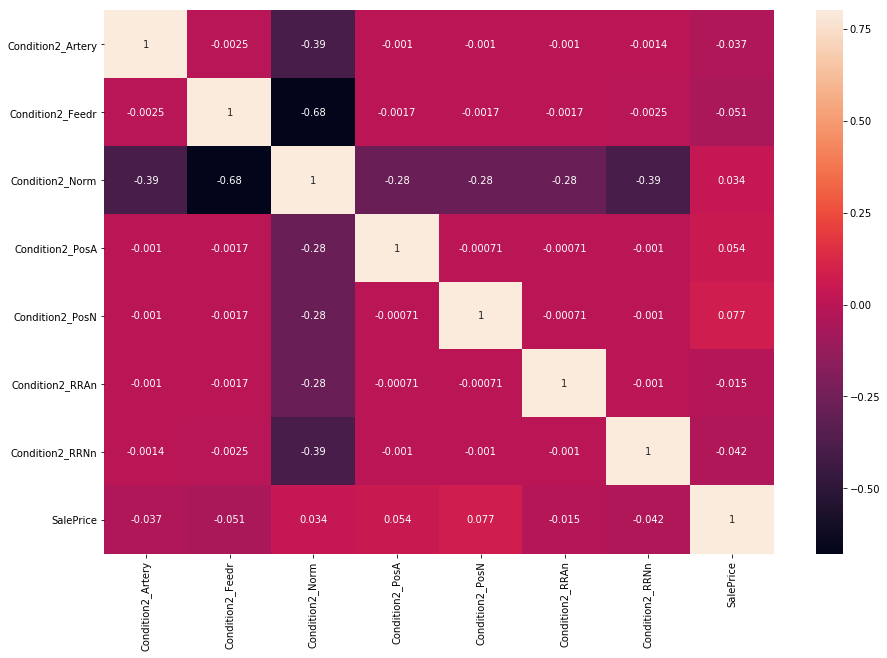

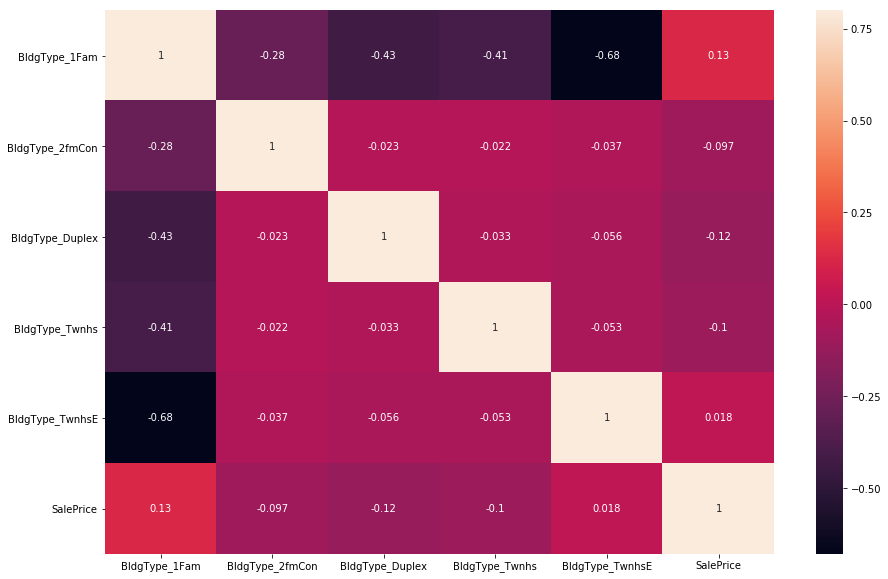

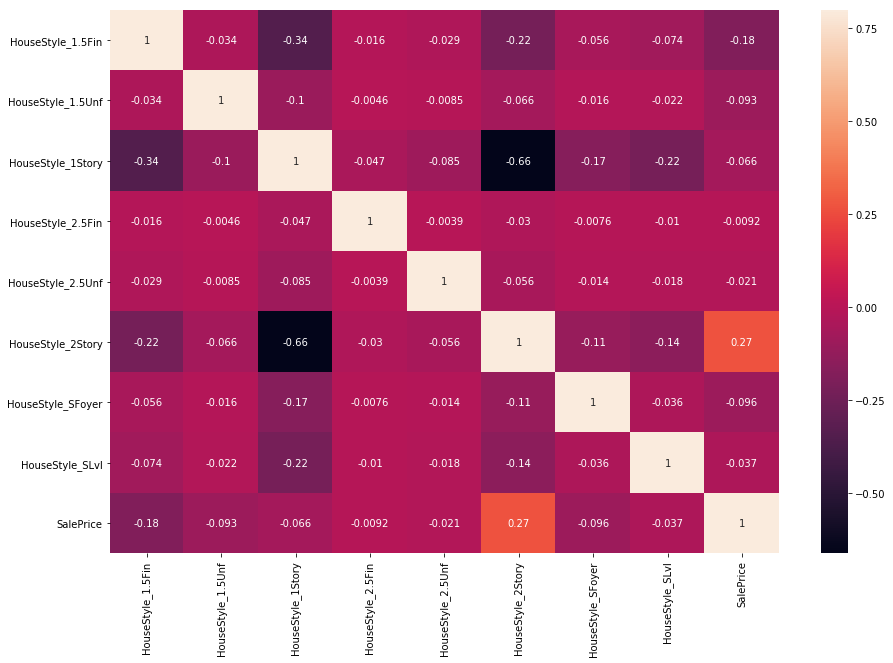

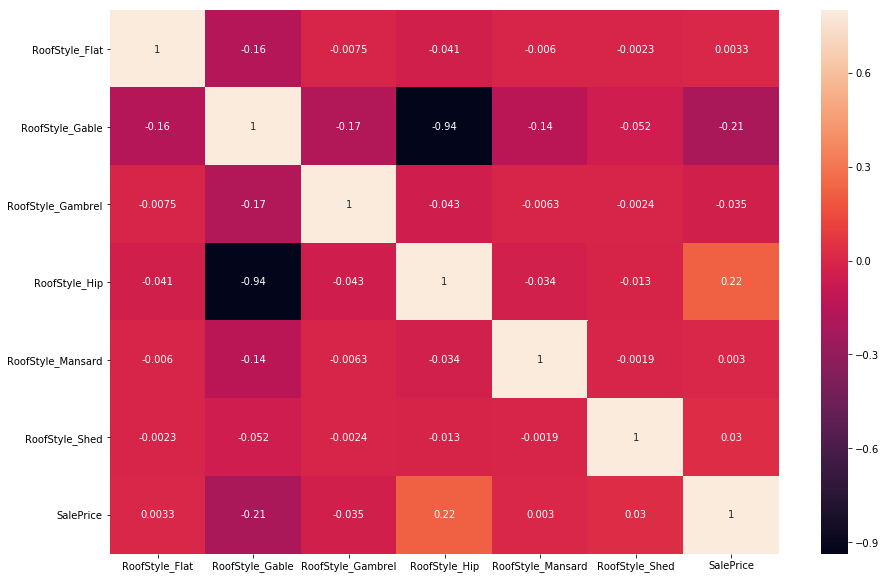

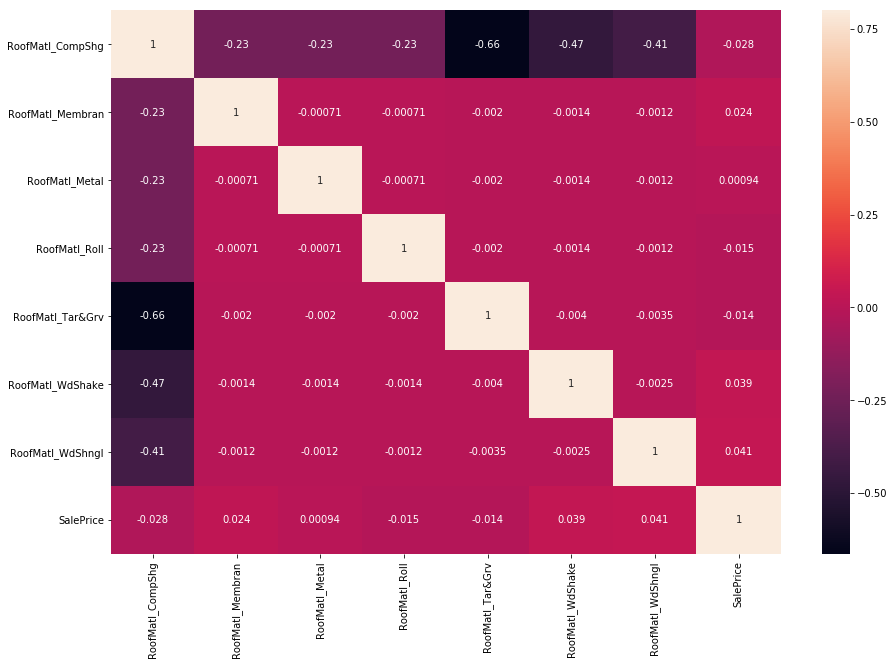

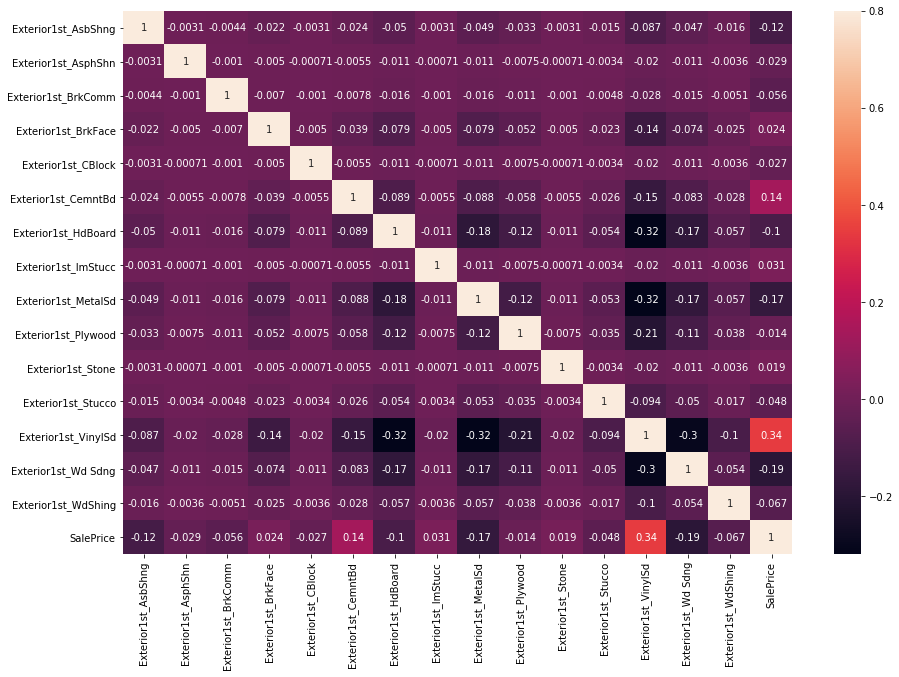

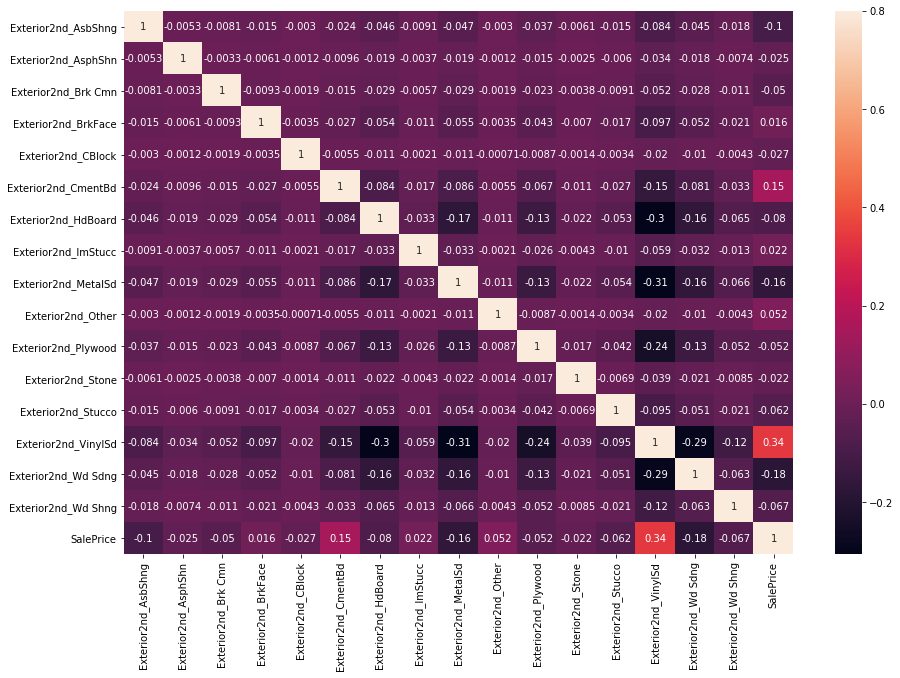

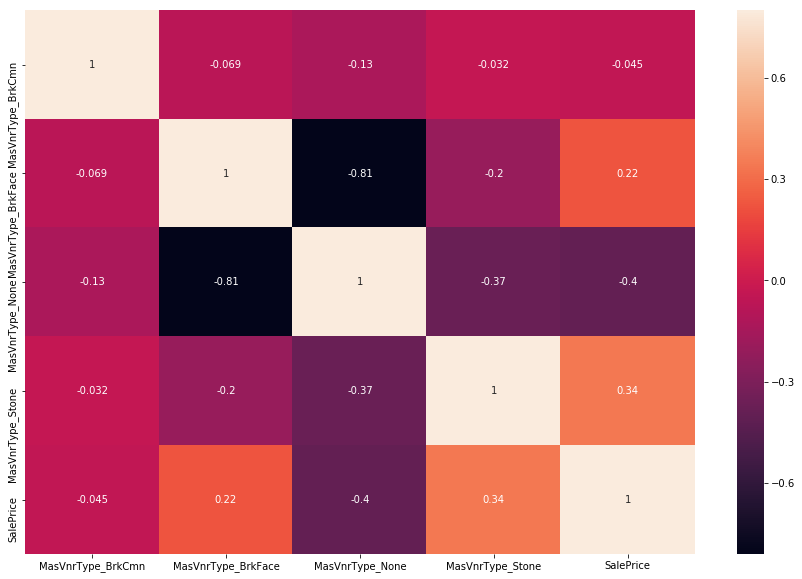

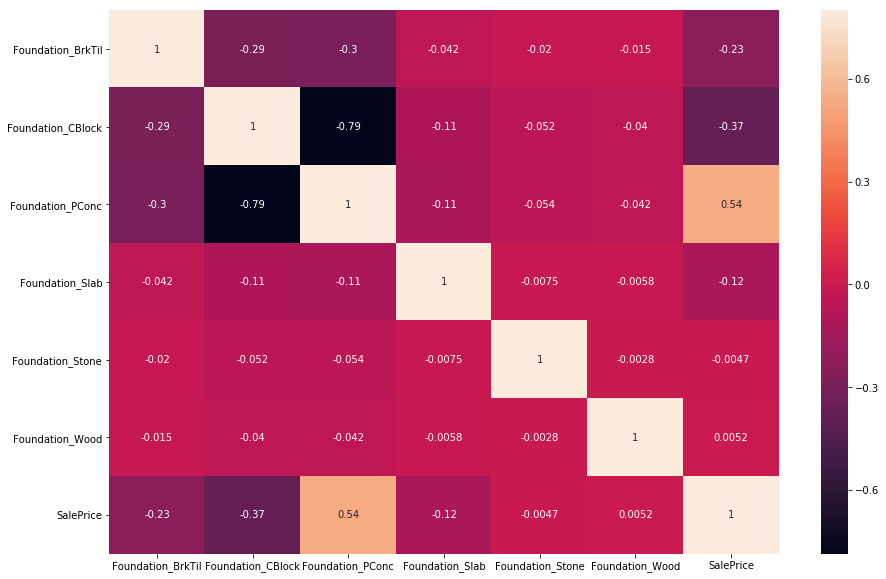

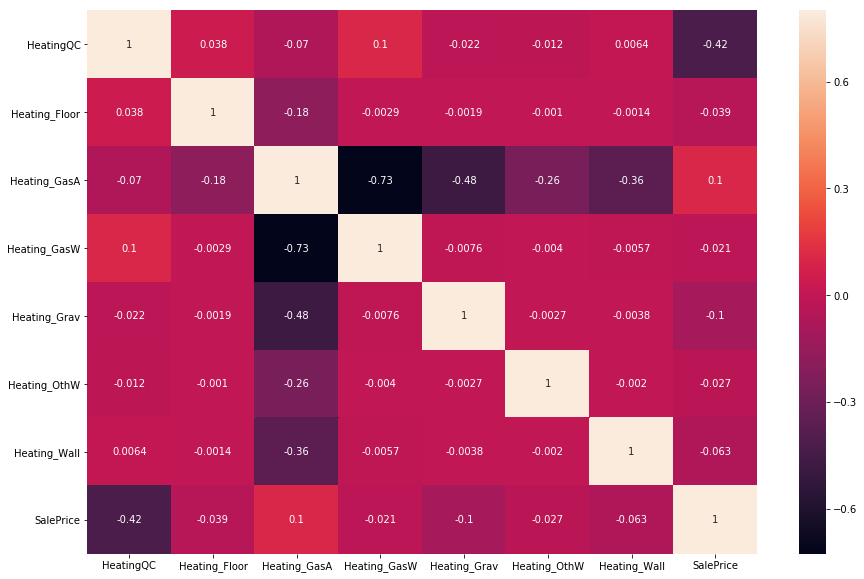

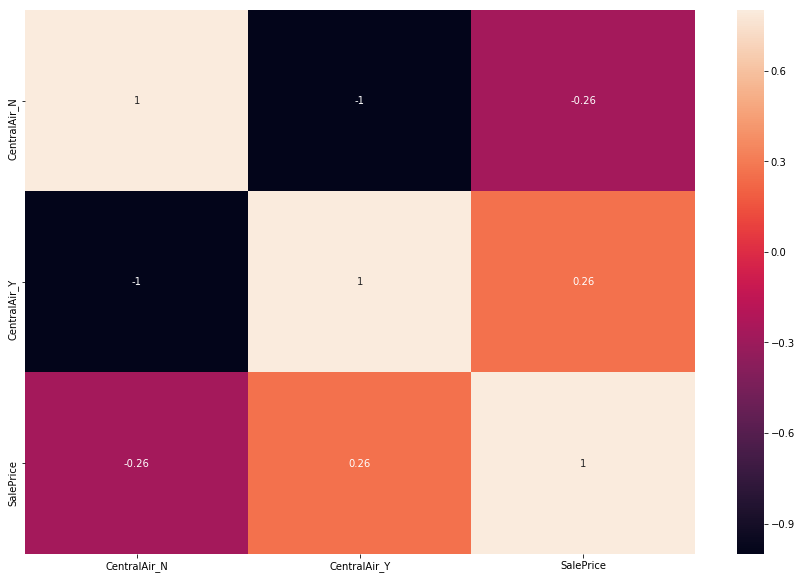

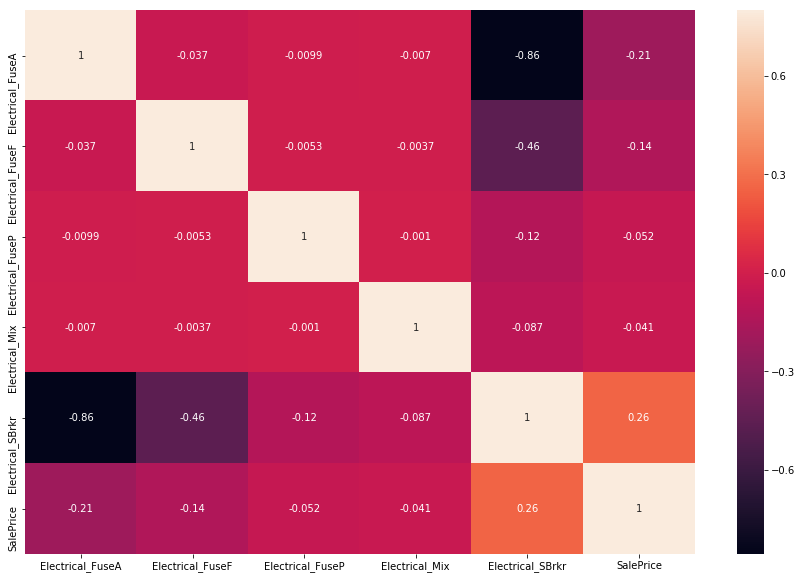

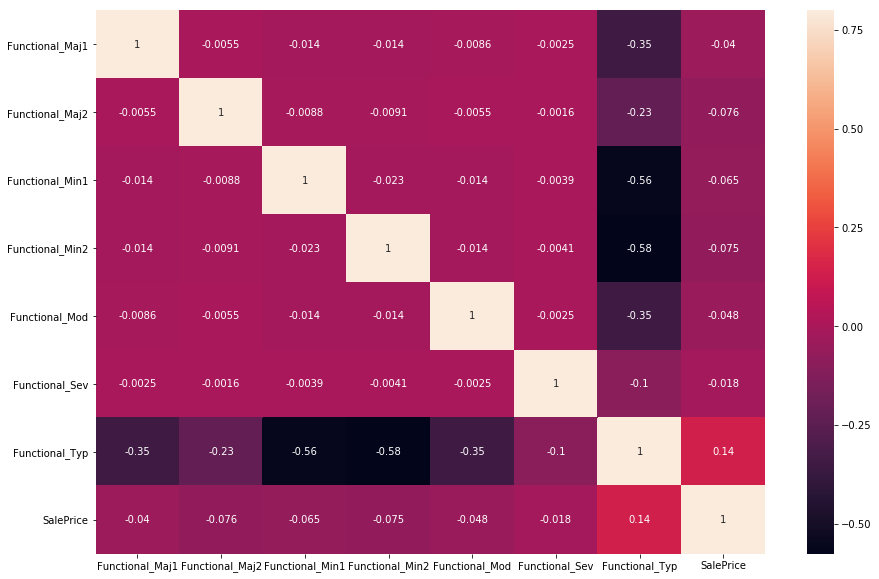

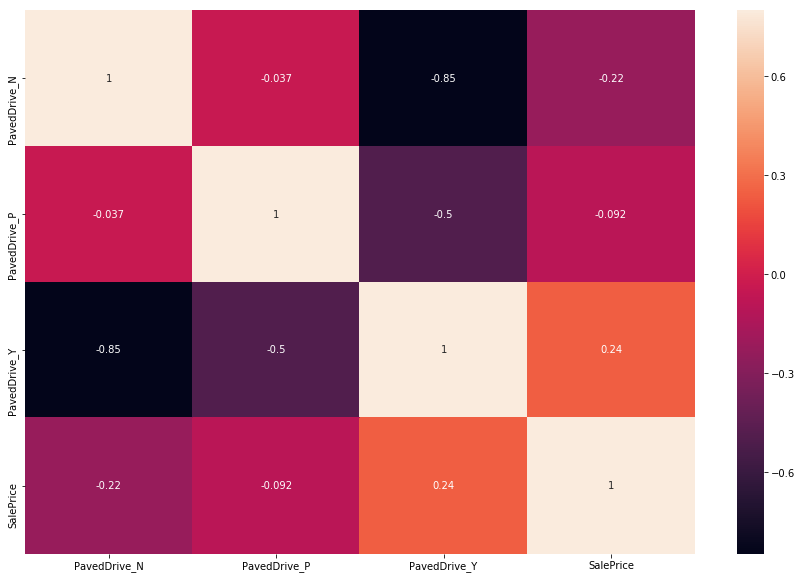

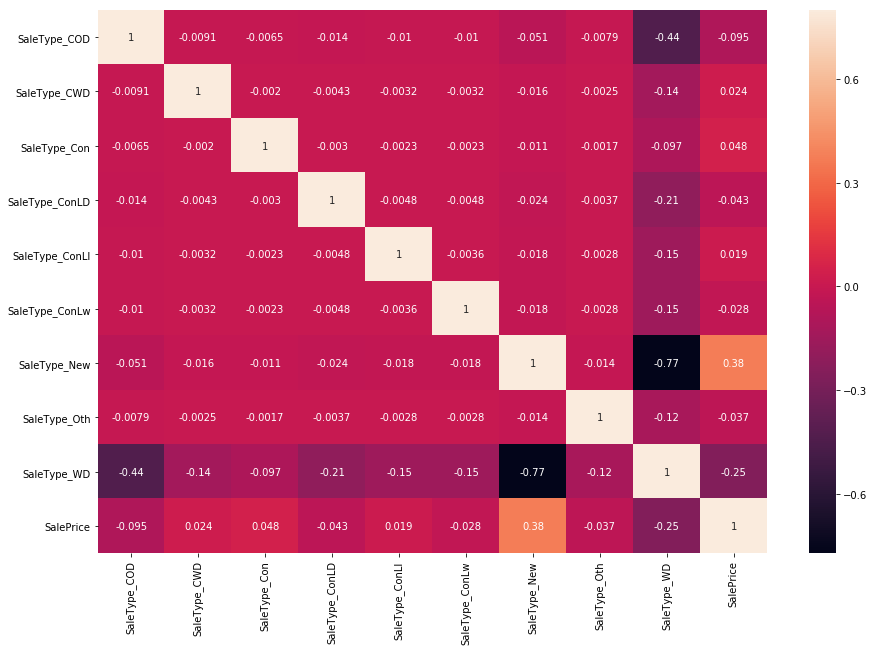

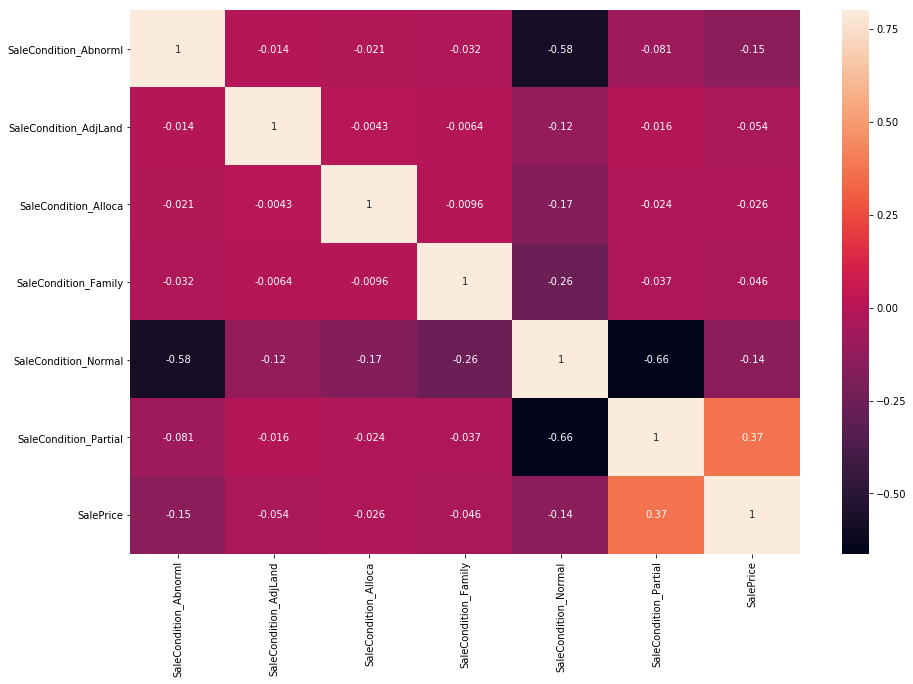

In [41]:
for col in cols:
    col.append('SalePrice')
    corr_mat = new_train[col].corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(corr_mat, annot=True, vmax=.8, cbar=True)

In [42]:
cat_features = ['Neighborhood_NridgHt','Foundation_PConc','SaleType_New',
                'SaleCondition_Partial','MasVnrType_Stone']

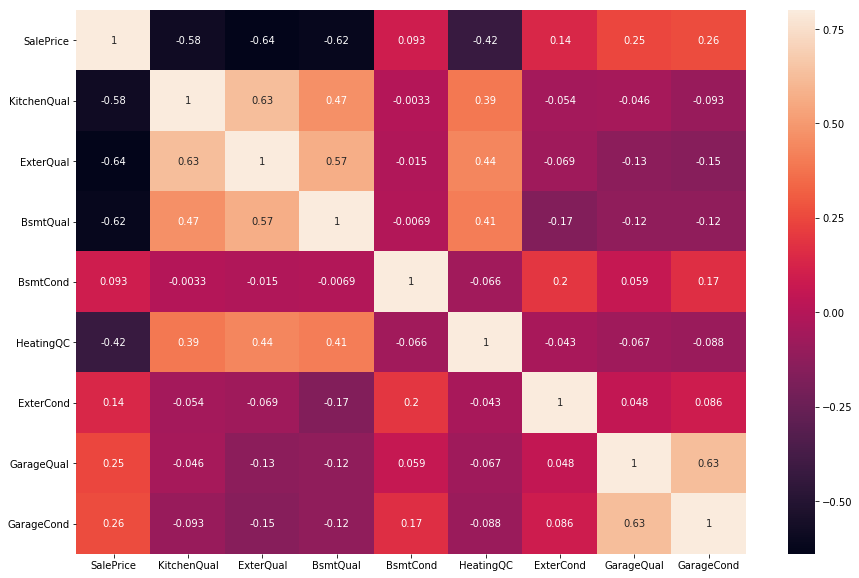

In [43]:
corr_mat = new_train[['SalePrice','KitchenQual','ExterQual','BsmtQual','BsmtCond','HeatingQC',
                      'ExterCond','GarageQual', 'GarageCond']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, annot=True, vmax=.8, cbar=True)

In [44]:
ordinal_features = ['KitchenQual','ExterQual','BsmtQual','HeatingQC']

## FEATURES SELECTION

In [45]:
features = []
for col in [numerical_features, ordinal_features, cat_features]:
    features.extend(col)

In [46]:
data = new_train[features]
data.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7       1710           2         548          856       856   
1            6       1262           2         460         1262      1262   
2            7       1786           2         608          920       920   
3            7       1717           3         642          756       961   
4            8       2198           3         836         1145      1145   

   FullBath  YearBuilt  YearRemodAdd  TotRmsAbvGrd        ...         \
0         2       2003          2003             8        ...          
1         2       1976          1976             6        ...          
2         2       2001          2002             6        ...          
3         1       1915          1970             7        ...          
4         2       2000          2000             9        ...          

   BsmtFinSF1  KitchenQual  ExterQual  BsmtQual  HeatingQC  \
0         706            2          2         2          0   
1         978            3          3         2          0   
2         486            2          2         2          0   
3         216            2          3         4          2   
4         655            2          2         2          0   

   Neighborhood_NridgHt  Foundation_PConc  SaleType_New  \
0                     0                 1             0   
1                     0                 0             0   
2                     0                 1             0   
3                     0                 0             0   
4                     0                 1             0   

   SaleCondition_Partial  MasVnrType_Stone  
0                      0                 0  
1                      0                 0  
2                      0                 0  
3                      0                 0  
4                      0                 0  

[5 rows x 22 columns]

In [47]:
target = new_train['SalePrice']

# MACHINE LEARNING MODELING

In [48]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [49]:
def calc_train_error(X_train, y_train, model):
    # return in-sample error for already fit model
    
    predictions = model.predict(X_train)
    mae = mean_absolute_error(y_train, predictions)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, predictions)
    return {
        'mae' : mae,
        'mse' : mse,
        'rmse' : rmse,
        'r2' : r2
    }

def calc_validation_error(X_test, y_test, model):
    # return out of sample error for already fit model
    
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return {
        'mae' : mae,
        'mse' : mse,
        'rmse' : rmse,
        'r2' : r2
    }


def calc_metrics(X_train, y_train, X_test, y_test, model):
    # fits model and returns the classification metrics for in sample error and out of sample error
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=101)

# Linear Regression

In [51]:
lm = make_pipeline(RobustScaler(), LinearRegression())
lm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [52]:
predictions = lm.predict(X_train)

Text(0, 0.5, 'Prediction')

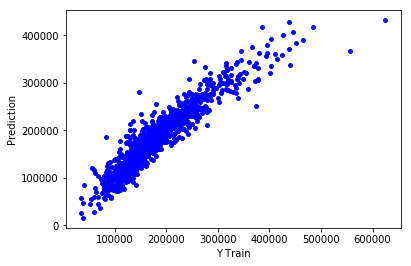

In [53]:
plt.scatter(y_train,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [54]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Prediction')

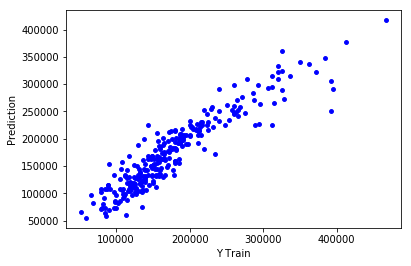

In [55]:
plt.scatter(y_test,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [56]:
kf = KFold(n_splits = 5, shuffle=True, random_state=42)
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
    model = make_pipeline(RobustScaler(), LinearRegression())
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, model)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [57]:
for i, tr in zip(range(1,6), train_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(tr['mae'],
                                                                                 tr['mse'],
                                                                                 tr['rmse'],
                                                                                 tr['r2']))


Train Error ke 1 : 
MAE Score : 18156.611005871917 
MSE Score : 658356987.0767864 
RMSE Score : 25658.468135817977 
R2 Score : 0.8708864073396387

Train Error ke 2 : 
MAE Score : 17984.796448983052 
MSE Score : 606186766.7510195 
RMSE Score : 24620.860398268363 
R2 Score : 0.8855407524385169

Train Error ke 3 : 
MAE Score : 18544.468643455562 
MSE Score : 664189801.5107181 
RMSE Score : 25771.880053863322 
R2 Score : 0.8780184276881576

Train Error ke 4 : 
MAE Score : 18339.911340924005 
MSE Score : 649452098.4764438 
RMSE Score : 25484.350069727967 
R2 Score : 0.8780258160827012

Train Error ke 5 : 
MAE Score : 17895.95680296 
MSE Score : 616235855.9738969 
RMSE Score : 24824.09829125515 
R2 Score : 0.876357732339357


In [58]:
for i, val in zip(range(1,6), validation_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(val['mae'],
                                                                                 val['mse'],
                                                                                 val['rmse'],
                                                                                 val['r2']))


Train Error ke 1 : 
MAE Score : 17909.05610368172 
MSE Score : 599605303.544091 
RMSE Score : 24486.83939474613 
R2 Score : 0.8946318523187212

Train Error ke 2 : 
MAE Score : 19945.610580448196 
MSE Score : 815519508.497921 
RMSE Score : 28557.30219222259 
R2 Score : 0.8358158351370452

Train Error ke 3 : 
MAE Score : 17875.93209375925 
MSE Score : 581248647.7770005 
RMSE Score : 24109.098858667458 
R2 Score : 0.866084329398665

Train Error ke 4 : 
MAE Score : 18110.260123081473 
MSE Score : 639544205.96982 
RMSE Score : 25289.211256380062 
R2 Score : 0.867346322375592

Train Error ke 5 : 
MAE Score : 19662.38753221174 
MSE Score : 777731211.9050779 
RMSE Score : 27887.83268569069 
R2 Score : 0.8749277540746654


# Ridge Regression

In [59]:
rlm = make_pipeline(RobustScaler(), Ridge(alpha=0.1))
rlm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridge', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [60]:
predictions = rlm.predict(X_train)

Text(0, 0.5, 'Prediction')

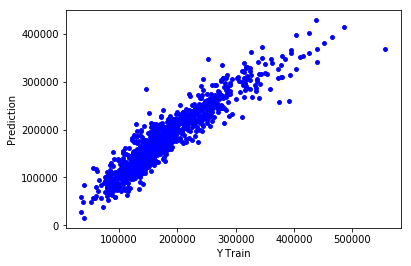

In [61]:
plt.scatter(y_train,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [62]:
predictions = rlm.predict(X_test)

Text(0, 0.5, 'Prediction')

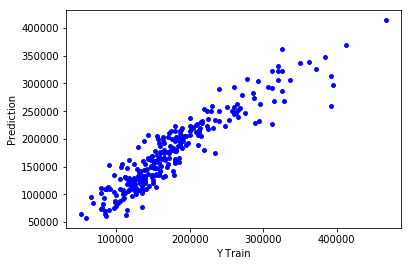

In [63]:
plt.scatter(y_test,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [64]:
kf = KFold(n_splits = 5, shuffle=True, random_state=42)
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
    model = make_pipeline(RobustScaler(), Ridge())
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, model)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [65]:
for i, tr in zip(range(1,6), train_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(tr['mae'],
                                                                                 tr['mse'],
                                                                                 tr['rmse'],
                                                                                 tr['r2']))


Train Error ke 1 : 
MAE Score : 18153.7500287968 
MSE Score : 658860379.4215733 
RMSE Score : 25668.275739160457 
R2 Score : 0.8707876846171205

Train Error ke 2 : 
MAE Score : 17973.80025467296 
MSE Score : 606377556.8195441 
RMSE Score : 24624.734654804794 
R2 Score : 0.8855047277529196

Train Error ke 3 : 
MAE Score : 18538.230363427243 
MSE Score : 665163323.6324357 
RMSE Score : 25790.76043144978 
R2 Score : 0.8778396357843714

Train Error ke 4 : 
MAE Score : 18336.999092765214 
MSE Score : 649511878.3145484 
RMSE Score : 25485.522916246948 
R2 Score : 0.8780145887774318

Train Error ke 5 : 
MAE Score : 17882.282255434977 
MSE Score : 616514717.7794865 
RMSE Score : 24829.71441195985 
R2 Score : 0.8763017811874193


In [66]:
for i, val in zip(range(1,6), validation_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(val['mae'],
                                                                                 val['mse'],
                                                                                 val['rmse'],
                                                                                 val['r2']))


Train Error ke 1 : 
MAE Score : 17850.362653800006 
MSE Score : 596840347.5509933 
RMSE Score : 24430.316157409696 
R2 Score : 0.8951177357652

Train Error ke 2 : 
MAE Score : 19947.701620271328 
MSE Score : 816351839.6286981 
RMSE Score : 28571.871475783628 
R2 Score : 0.8356482663785151

Train Error ke 3 : 
MAE Score : 17760.46814246515 
MSE Score : 570010087.2200394 
RMSE Score : 23874.884025268886 
R2 Score : 0.8686736160651117

Train Error ke 4 : 
MAE Score : 18077.34125289393 
MSE Score : 635851760.4337292 
RMSE Score : 25216.101213980903 
R2 Score : 0.8681122060709144

Train Error ke 5 : 
MAE Score : 19648.192671004887 
MSE Score : 777143564.3889812 
RMSE Score : 27877.29478247452 
R2 Score : 0.8750222576686135


# Lasso Regression

In [67]:
llm = make_pipeline(RobustScaler(), Lasso(alpha=0.1, random_state=1))
llm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [68]:
predictions = llm.predict(X_train)

Text(0, 0.5, 'Prediction')

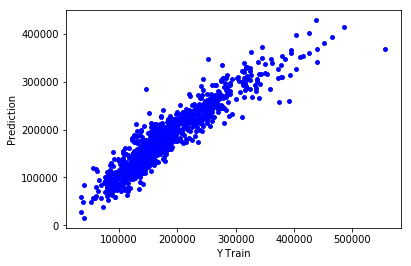

In [69]:
plt.scatter(y_train,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [70]:
predictions = llm.predict(X_test)

Text(0, 0.5, 'Prediction')

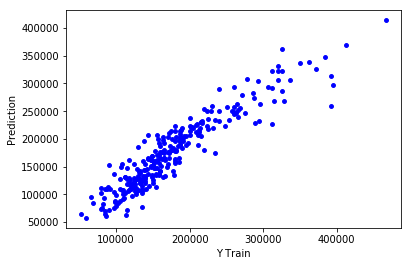

In [71]:
plt.scatter(y_test,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [72]:
kf = KFold(n_splits = 5, shuffle=True, random_state=42)
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
    model = make_pipeline(RobustScaler(), Lasso(alpha=0.1, random_state=1))
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, model)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [73]:
for i, tr in zip(range(1,6), train_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(tr['mae'],
                                                                                 tr['mse'],
                                                                                 tr['rmse'],
                                                                                 tr['r2']))


Train Error ke 1 : 
MAE Score : 18156.588854597445 
MSE Score : 658357011.9638538 
RMSE Score : 25658.468620785883 
R2 Score : 0.8708864024589149

Train Error ke 2 : 
MAE Score : 17984.70380268707 
MSE Score : 606186784.0489985 
RMSE Score : 24620.860749555417 
R2 Score : 0.8855407491723393

Train Error ke 3 : 
MAE Score : 18544.467725743056 
MSE Score : 664189826.9560993 
RMSE Score : 25771.880547528915 
R2 Score : 0.878018423014994

Train Error ke 4 : 
MAE Score : 18339.92052424281 
MSE Score : 649452116.6013628 
RMSE Score : 25484.35042533678 
R2 Score : 0.8780258126786439

Train Error ke 5 : 
MAE Score : 17895.861370643248 
MSE Score : 616235873.2254362 
RMSE Score : 24824.098638730797 
R2 Score : 0.8763577288779885


In [74]:
for i, val in zip(range(1,6), validation_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(val['mae'],
                                                                                 val['mse'],
                                                                                 val['rmse'],
                                                                                 val['r2']))


Train Error ke 1 : 
MAE Score : 17908.60093649393 
MSE Score : 599576467.9400902 
RMSE Score : 24486.250589669504 
R2 Score : 0.8946369195757367

Train Error ke 2 : 
MAE Score : 19945.552137885374 
MSE Score : 815519461.2469791 
RMSE Score : 28557.301364922056 
R2 Score : 0.8358158446498237

Train Error ke 3 : 
MAE Score : 17875.355234738512 
MSE Score : 581180724.3310549 
RMSE Score : 24107.69014922531 
R2 Score : 0.8660999784910941

Train Error ke 4 : 
MAE Score : 18109.885810023887 
MSE Score : 639476364.3526349 
RMSE Score : 25287.869905403953 
R2 Score : 0.8673603940221358

Train Error ke 5 : 
MAE Score : 19662.319330012167 
MSE Score : 777725008.3272929 
RMSE Score : 27887.721461734607 
R2 Score : 0.8749287517142026


# Random Forest Regressor

In [75]:
rfr = RandomForestRegressor(random_state=5)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

In [76]:
predictions = rfr.predict(X_train)

Text(0, 0.5, 'Prediction')

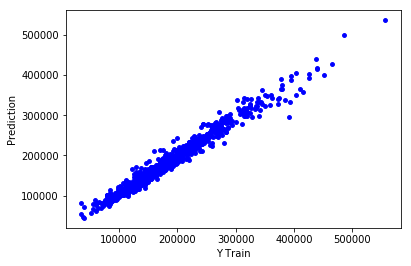

In [77]:
plt.scatter(y_train,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [78]:
predictions = rfr.predict(X_test)

Text(0, 0.5, 'Prediction')

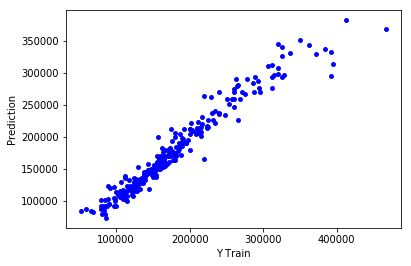

In [79]:
plt.scatter(y_test,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [80]:
kf = KFold(n_splits = 5, shuffle=True, random_state=42)
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
    model = RandomForestRegressor(n_estimators=10,  max_depth=4, max_features='sqrt',
                               min_samples_leaf=15, min_samples_split=10, random_state=5)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, model)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [81]:
for i, tr in zip(range(1,6), train_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(tr['mae'],
                                                                                 tr['mse'],
                                                                                 tr['rmse'],
                                                                                 tr['r2']))


Train Error ke 1 : 
MAE Score : 20707.486647372873 
MSE Score : 911607108.4128835 
RMSE Score : 30192.83207009378 
R2 Score : 0.8212202935909861

Train Error ke 2 : 
MAE Score : 20537.67672291261 
MSE Score : 906315400.5955151 
RMSE Score : 30105.072672151367 
R2 Score : 0.8288709280779226

Train Error ke 3 : 
MAE Score : 21608.354232074285 
MSE Score : 976347922.0237566 
RMSE Score : 31246.566563764354 
R2 Score : 0.8206891247336684

Train Error ke 4 : 
MAE Score : 20624.35999775729 
MSE Score : 908373924.6310296 
RMSE Score : 30139.24227035294 
R2 Score : 0.8293974745657975

Train Error ke 5 : 
MAE Score : 20378.218538465168 
MSE Score : 877100346.4014364 
RMSE Score : 29615.879970067348 
R2 Score : 0.8240175823206192


In [82]:
for i, val in zip(range(1,6), validation_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(val['mae'],
                                                                                 val['mse'],
                                                                                 val['rmse'],
                                                                                 val['r2']))


Train Error ke 1 : 
MAE Score : 21997.075566124477 
MSE Score : 1069785337.4292773 
RMSE Score : 32707.573089871363 
R2 Score : 0.8120075010089934

Train Error ke 2 : 
MAE Score : 24446.364418972098 
MSE Score : 1211228360.5149553 
RMSE Score : 34802.70622401303 
R2 Score : 0.7561498961615817

Train Error ke 3 : 
MAE Score : 21269.834779302753 
MSE Score : 909676390.8095561 
RMSE Score : 30160.842010951153 
R2 Score : 0.7904168476410791

Train Error ke 4 : 
MAE Score : 21746.542322537953 
MSE Score : 1011466821.1986493 
RMSE Score : 31803.566171086055 
R2 Score : 0.7902024717375016

Train Error ke 5 : 
MAE Score : 21958.251331332962 
MSE Score : 1097081265.8475823 
RMSE Score : 33122.217103442556 
R2 Score : 0.8235708998407624


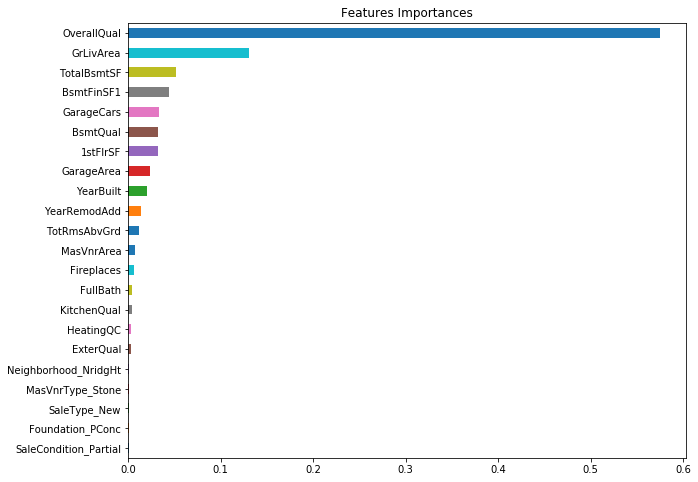

In [83]:
plt.figure(figsize=(10,8))
coef1 = pd.Series(rfr.feature_importances_, data.columns).sort_values(ascending=True)
coef1.plot(kind='barh', title='Features Importances')

# Gradient Boosting Regressor

In [84]:
# gb = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.05, max_depth=4, max_features='sqrt',
#                                min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=5)
gb = GradientBoostingRegressor(learning_rate=0.05, loss='huber', random_state=5)
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=5,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [85]:
predictions = gb.predict(X_train)

Text(0, 0.5, 'Prediction')

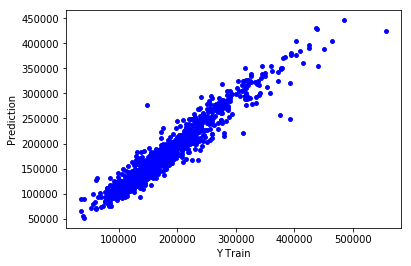

In [86]:
plt.scatter(y_train,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [87]:
predictions = gb.predict(X_test)

Text(0, 0.5, 'Prediction')

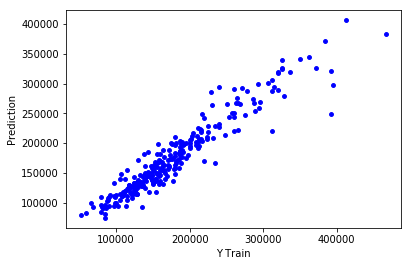

In [88]:
plt.scatter(y_test,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [89]:
kf = KFold(n_splits = 5, shuffle=True, random_state=42)
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
#     model = GradientBoostingRegressor(n_estimators = 4000, learning_rate=0.05, max_depth=4, max_features='sqrt',
#                                min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=5)
    model = gb = GradientBoostingRegressor(learning_rate=0.05, loss='huber', random_state=5)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, model)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [90]:
for i, tr in zip(range(1,6), train_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(tr['mae'],
                                                                                 tr['mse'],
                                                                                 tr['rmse'],
                                                                                 tr['r2']))


Train Error ke 1 : 
MAE Score : 13316.95647646487 
MSE Score : 399849708.18494666 
RMSE Score : 19996.242351625635 
R2 Score : 0.9215835278407485

Train Error ke 2 : 
MAE Score : 12954.481478443884 
MSE Score : 384413078.3165282 
RMSE Score : 19606.455016563505 
R2 Score : 0.9274157172174374

Train Error ke 3 : 
MAE Score : 13490.26637550696 
MSE Score : 422076825.8304018 
RMSE Score : 20544.508410531555 
R2 Score : 0.9224836112597955

Train Error ke 4 : 
MAE Score : 12967.799166838322 
MSE Score : 384035942.3330057 
RMSE Score : 19596.835008056933 
R2 Score : 0.9278738635676635

Train Error ke 5 : 
MAE Score : 13223.300612683111 
MSE Score : 375652443.5580588 
RMSE Score : 19381.75543025086 
R2 Score : 0.9246286636463629


In [91]:
for i, val in zip(range(1,6), validation_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(val['mae'],
                                                                                 val['mse'],
                                                                                 val['rmse'],
                                                                                 val['r2']))


Train Error ke 1 : 
MAE Score : 15787.813258681916 
MSE Score : 563571146.4559639 
RMSE Score : 23739.653461159956 
R2 Score : 0.9009641051576973

Train Error ke 2 : 
MAE Score : 18267.922168352976 
MSE Score : 715765250.0333849 
RMSE Score : 26753.789451839995 
R2 Score : 0.8558988245037734

Train Error ke 3 : 
MAE Score : 16251.883684361652 
MSE Score : 592770599.7682285 
RMSE Score : 24346.88069893613 
R2 Score : 0.8634297513046896

Train Error ke 4 : 
MAE Score : 17134.02259797585 
MSE Score : 673359025.532224 
RMSE Score : 25949.162328141232 
R2 Score : 0.8603324832519046

Train Error ke 5 : 
MAE Score : 17389.43433241011 
MSE Score : 730518793.9544752 
RMSE Score : 27028.111179926636 
R2 Score : 0.8825203041205649


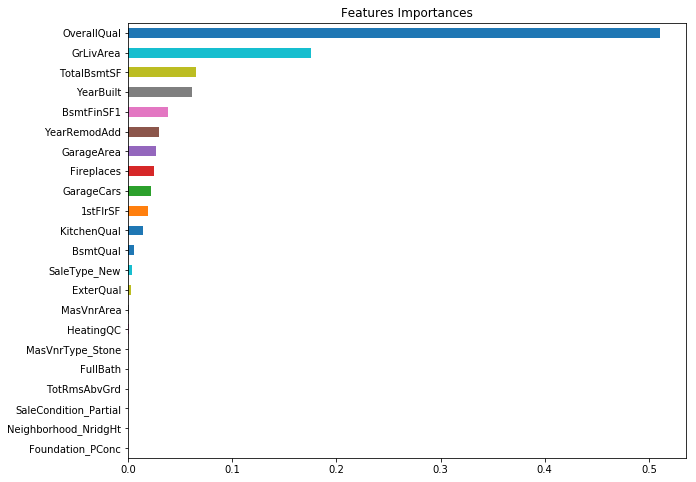

In [92]:
plt.figure(figsize=(10,8))
coef1 = pd.Series(gb.feature_importances_, data.columns).sort_values(ascending=True)
coef1.plot(kind='barh', title='Features Importances')

# XGBoost

In [93]:
# xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, 
#                    min_child_weight=1.7817, n_estimators = 3500, reg_alpha=0.4640, random_state=7)
xgb = XGBRegressor(learning_rate=0.05, reg_alpha=0.4640, random_state=3)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=3,
       reg_alpha=0.464, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [94]:
predictions = xgb.predict(X_train)

Text(0, 0.5, 'Prediction')

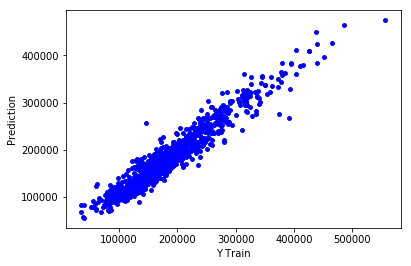

In [95]:
plt.scatter(y_train,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [96]:
predictions = xgb.predict(X_test)

Text(0, 0.5, 'Prediction')

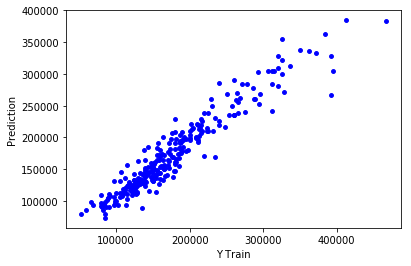

In [97]:
plt.scatter(y_test,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [98]:
kf = KFold(n_splits = 5, shuffle=True, random_state=42)
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
#     model = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, 
#                    min_child_weight=1.7817, n_estimators = 4000, reg_alpha=0.4640, random_state=7)
    model = xgb = XGBRegressor(learning_rate=0.05, reg_alpha=0.4640, random_state=3)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, model)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [99]:
for i, tr in zip(range(1,6), train_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(tr['mae'],
                                                                                 tr['mse'],
                                                                                 tr['rmse'],
                                                                                 tr['r2']))


Train Error ke 1 : 
MAE Score : 13482.209655110099 
MSE Score : 354947612.4710042 
RMSE Score : 18840.053409452008 
R2 Score : 0.9303894963493357

Train Error ke 2 : 
MAE Score : 13229.064253472223 
MSE Score : 346296791.60396045 
RMSE Score : 18609.05133541096 
R2 Score : 0.9346127755107773

Train Error ke 3 : 
MAE Score : 13827.537159722222 
MSE Score : 373140656.69906795 
RMSE Score : 19316.849036503547 
R2 Score : 0.9314709682471822

Train Error ke 4 : 
MAE Score : 13282.396854166667 
MSE Score : 334046341.31651974 
RMSE Score : 18276.934680534363 
R2 Score : 0.9372624555864457

Train Error ke 5 : 
MAE Score : 13700.895399305555 
MSE Score : 358417620.50414044 
RMSE Score : 18931.92067657533 
R2 Score : 0.9280866782757593


In [100]:
for i, val in zip(range(1,6), validation_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(val['mae'],
                                                                                 val['mse'],
                                                                                 val['rmse'],
                                                                                 val['r2']))


Train Error ke 1 : 
MAE Score : 15799.700493129432 
MSE Score : 538628521.8834975 
RMSE Score : 23208.37180595609 
R2 Score : 0.905347252094484

Train Error ke 2 : 
MAE Score : 18188.88849810943 
MSE Score : 699289931.0956341 
RMSE Score : 26444.090664941272 
R2 Score : 0.8592157120244995

Train Error ke 3 : 
MAE Score : 15632.212772464412 
MSE Score : 538161012.0011961 
RMSE Score : 23198.297609979836 
R2 Score : 0.8760114228407071

Train Error ke 4 : 
MAE Score : 17304.20265235765 
MSE Score : 661265394.8915075 
RMSE Score : 25715.081078843745 
R2 Score : 0.8628409331219015

Train Error ke 5 : 
MAE Score : 17221.526912811387 
MSE Score : 686015718.5775276 
RMSE Score : 26191.90177473808 
R2 Score : 0.8896771463596014


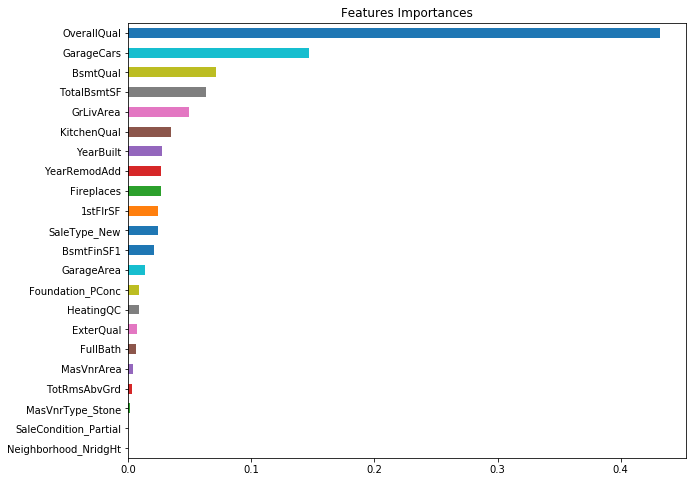

In [101]:
plt.figure(figsize=(10,8))
coef1 = pd.Series(xgb.feature_importances_, data.columns).sort_values(ascending=True)
coef1.plot(kind='barh', title='Features Importances')

# OPTIMIZING MODEL & DEPLOYMENT

In [102]:
data = data.drop(['Neighborhood_NridgHt','Foundation_PConc','SaleType_New',
                'SaleCondition_Partial','MasVnrType_Stone'],axis=1)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=101)

# Random Forest Regressor

In [104]:
rfr = RandomForestRegressor(random_state=5)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

In [105]:
predictions = rfr.predict(X_train)

Text(0, 0.5, 'Prediction')

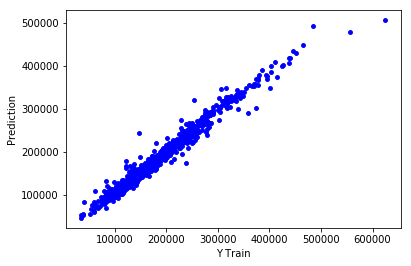

In [106]:
plt.scatter(y_train,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [107]:
predictions = rfr.predict(X_test)

Text(0, 0.5, 'Prediction')

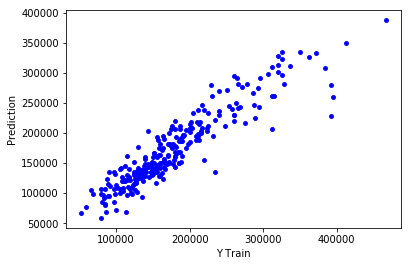

In [108]:
plt.scatter(y_test,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [109]:
kf = KFold(n_splits = 5, shuffle=True, random_state=42)
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
    model = RandomForestRegressor(n_estimators=10,  max_depth=4, max_features='sqrt',
                               min_samples_leaf=15, min_samples_split=10, random_state=5)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, model)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [110]:
for i, tr in zip(range(1,6), train_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(tr['mae'],
                                                                                 tr['mse'],
                                                                                 tr['rmse'],
                                                                                 tr['r2']))


Train Error ke 1 : 
MAE Score : 20287.07537509648 
MSE Score : 893542330.5954108 
RMSE Score : 29892.178418365744 
R2 Score : 0.8247630650818476

Train Error ke 2 : 
MAE Score : 20620.713281059834 
MSE Score : 900909507.8830122 
RMSE Score : 30015.154636999825 
R2 Score : 0.8298916603772889

Train Error ke 3 : 
MAE Score : 20095.094035421313 
MSE Score : 847936995.8751438 
RMSE Score : 29119.357751762724 
R2 Score : 0.8442723936095229

Train Error ke 4 : 
MAE Score : 19862.98871764032 
MSE Score : 823753080.9047607 
RMSE Score : 28701.098949426323 
R2 Score : 0.8452901914884441

Train Error ke 5 : 
MAE Score : 20206.19123297465 
MSE Score : 837691347.3851712 
RMSE Score : 28942.89804745149 
R2 Score : 0.8319246490019411


In [111]:
for i, val in zip(range(1,6), validation_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(val['mae'],
                                                                                 val['mse'],
                                                                                 val['rmse'],
                                                                                 val['r2']))


Train Error ke 1 : 
MAE Score : 21386.269820794314 
MSE Score : 1031663054.4748607 
RMSE Score : 32119.512052253544 
R2 Score : 0.8187066984919809

Train Error ke 2 : 
MAE Score : 23928.808367916885 
MSE Score : 1179780300.9256778 
RMSE Score : 34347.93008211234 
R2 Score : 0.7624811651826454

Train Error ke 3 : 
MAE Score : 20395.89912615179 
MSE Score : 868807734.8636341 
RMSE Score : 29475.544691551233 
R2 Score : 0.7998327034688817

Train Error ke 4 : 
MAE Score : 21382.779085609967 
MSE Score : 952282321.8425732 
RMSE Score : 30859.07195368281 
R2 Score : 0.8024784667737437

Train Error ke 5 : 
MAE Score : 21751.173606035987 
MSE Score : 1046206582.729233 
RMSE Score : 32345.116829735412 
R2 Score : 0.8317524036571841


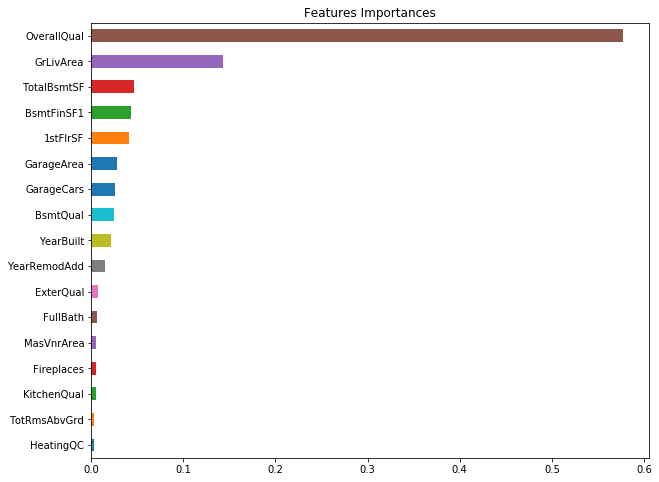

In [112]:
plt.figure(figsize=(10,8))
coef1 = pd.Series(rfr.feature_importances_, data.columns).sort_values(ascending=True)
coef1.plot(kind='barh', title='Features Importances')

# Gradient Boosting Regressor

In [113]:
# gb = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.05, max_depth=4, max_features='sqrt',
#                                min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=5)
gb = GradientBoostingRegressor(learning_rate=0.05, loss='huber', random_state=5)
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=5,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [114]:
predictions = gb.predict(X_train)

Text(0, 0.5, 'Prediction')

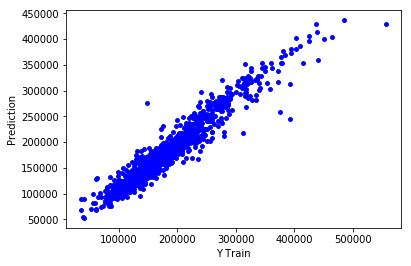

In [115]:
plt.scatter(y_train,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [116]:
predictions = gb.predict(X_test)

Text(0, 0.5, 'Prediction')

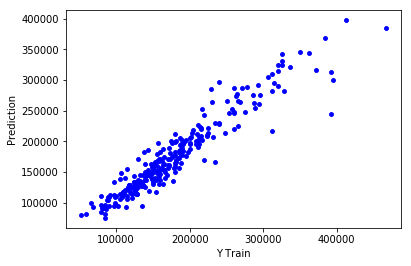

In [117]:
plt.scatter(y_test,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [118]:
kf = KFold(n_splits = 5, shuffle=True, random_state=42)
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
#     model = GradientBoostingRegressor(n_estimators = 4000, learning_rate=0.05, max_depth=4, max_features='sqrt',
#                                min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=5)
    model = gb = GradientBoostingRegressor(learning_rate=0.05, loss='huber', random_state=5)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, model)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [119]:
for i, tr in zip(range(1,6), train_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(tr['mae'],
                                                                                 tr['mse'],
                                                                                 tr['rmse'],
                                                                                 tr['r2']))


Train Error ke 1 : 
MAE Score : 13438.894116702144 
MSE Score : 405283970.42833865 
RMSE Score : 20131.66586322003 
R2 Score : 0.9205177882261083

Train Error ke 2 : 
MAE Score : 12982.941352164413 
MSE Score : 384857831.0315034 
RMSE Score : 19617.79373506367 
R2 Score : 0.927331739697803

Train Error ke 3 : 
MAE Score : 13581.954580254162 
MSE Score : 426802625.8877503 
RMSE Score : 20659.20196638172 
R2 Score : 0.9216156959137369

Train Error ke 4 : 
MAE Score : 12996.149863168965 
MSE Score : 383429589.50707203 
RMSE Score : 19581.358214053285 
R2 Score : 0.9279877432383624

Train Error ke 5 : 
MAE Score : 13238.04139044182 
MSE Score : 377312516.0903481 
RMSE Score : 19424.53387060673 
R2 Score : 0.9242955847928953


In [120]:
for i, val in zip(range(1,6), validation_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(val['mae'],
                                                                                 val['mse'],
                                                                                 val['rmse'],
                                                                                 val['r2']))


Train Error ke 1 : 
MAE Score : 16028.460228798898 
MSE Score : 567733279.3385861 
RMSE Score : 23827.154243396042 
R2 Score : 0.9002326969635852

Train Error ke 2 : 
MAE Score : 18403.769806778368 
MSE Score : 732900803.4095628 
RMSE Score : 27072.140724544908 
R2 Score : 0.8524490155277573

Train Error ke 3 : 
MAE Score : 16331.56839520587 
MSE Score : 603166567.1767342 
RMSE Score : 24559.449651340605 
R2 Score : 0.8610345922752722

Train Error ke 4 : 
MAE Score : 17227.57670475963 
MSE Score : 685438332.8308394 
RMSE Score : 26180.877235700857 
R2 Score : 0.8578270043165012

Train Error ke 5 : 
MAE Score : 17460.120457417688 
MSE Score : 711271506.8357408 
RMSE Score : 26669.673916936834 
R2 Score : 0.885615591272553


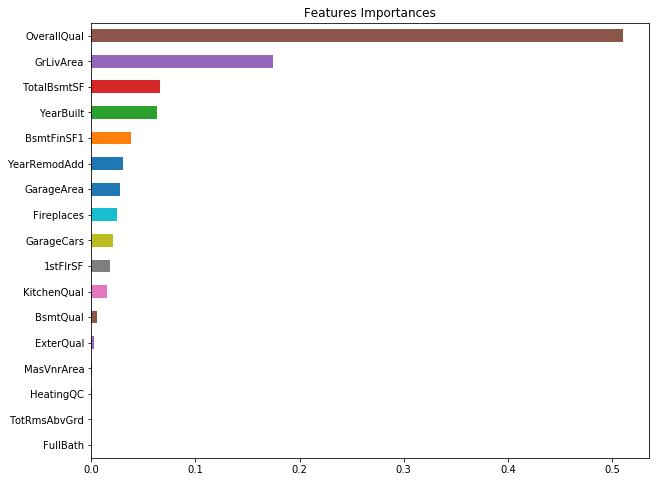

In [121]:
plt.figure(figsize=(10,8))
coef1 = pd.Series(gb.feature_importances_, data.columns).sort_values(ascending=True)
coef1.plot(kind='barh', title='Features Importances')

# XGBoost

In [122]:
# xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, 
#                    min_child_weight=1.7817, n_estimators = 3500, reg_alpha=0.4640, random_state=7)
xgb = XGBRegressor(learning_rate=0.05, reg_alpha=0.4640, random_state=3)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=3,
       reg_alpha=0.464, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [123]:
predictions = xgb.predict(X_train)

Text(0, 0.5, 'Prediction')

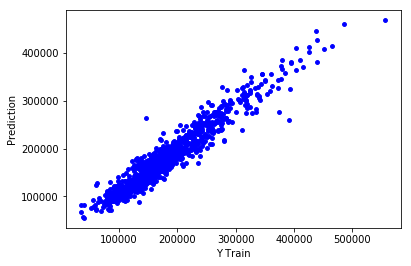

In [124]:
plt.scatter(y_train,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [125]:
predictions = xgb.predict(X_test)

Text(0, 0.5, 'Prediction')

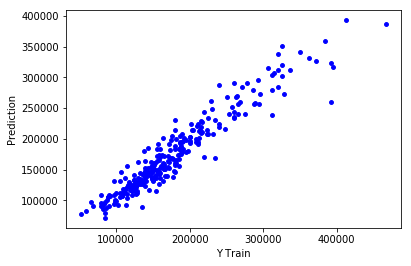

In [126]:
plt.scatter(y_test,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [127]:
kf = KFold(n_splits = 5, shuffle=True, random_state=42)
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
#     model = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, 
#                    min_child_weight=1.7817, n_estimators = 4000, reg_alpha=0.4640, random_state=7)
    model = XGBRegressor(learning_rate=0.05, reg_alpha=0.4640, random_state=3)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, model)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [128]:
for i, tr in zip(range(1,6), train_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(tr['mae'],
                                                                                 tr['mse'],
                                                                                 tr['rmse'],
                                                                                 tr['r2']))


Train Error ke 1 : 
MAE Score : 13460.155103147243 
MSE Score : 355678541.11878943 
RMSE Score : 18859.441696900507 
R2 Score : 0.9302461503751205

Train Error ke 2 : 
MAE Score : 13241.18845486111 
MSE Score : 351041362.6582545 
RMSE Score : 18736.09785035973 
R2 Score : 0.9337169129438869

Train Error ke 3 : 
MAE Score : 13853.74889236111 
MSE Score : 377785750.46818274 
RMSE Score : 19436.711410837554 
R2 Score : 0.9306178749894963

Train Error ke 4 : 
MAE Score : 13259.537631944444 
MSE Score : 341651786.9728686 
RMSE Score : 18483.825009257922 
R2 Score : 0.9358340699835094

Train Error ke 5 : 
MAE Score : 13724.889555555555 
MSE Score : 366679727.7009755 
RMSE Score : 19148.88319722525 
R2 Score : 0.9264289596286391


In [129]:
for i, val in zip(range(1,6), validation_errors):
    print('\nTrain Error ke ' + str(i) + ' : ')
    print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(val['mae'],
                                                                                 val['mse'],
                                                                                 val['rmse'],
                                                                                 val['r2']))


Train Error ke 1 : 
MAE Score : 15870.958942819148 
MSE Score : 543739562.1185008 
RMSE Score : 23318.2238199761 
R2 Score : 0.9044490931904456

Train Error ke 2 : 
MAE Score : 18384.32159141459 
MSE Score : 715944919.8650717 
RMSE Score : 26757.14708008071 
R2 Score : 0.855862652541044

Train Error ke 3 : 
MAE Score : 15717.992270907473 
MSE Score : 542008055.0943195 
RMSE Score : 23281.066450966533 
R2 Score : 0.8751250907045066

Train Error ke 4 : 
MAE Score : 17586.585909697507 
MSE Score : 691713598.4689051 
RMSE Score : 26300.44863626674 
R2 Score : 0.856525394424348

Train Error ke 5 : 
MAE Score : 17271.978981316726 
MSE Score : 662230681.3958693 
RMSE Score : 25733.843113609542 
R2 Score : 0.8935021799627156


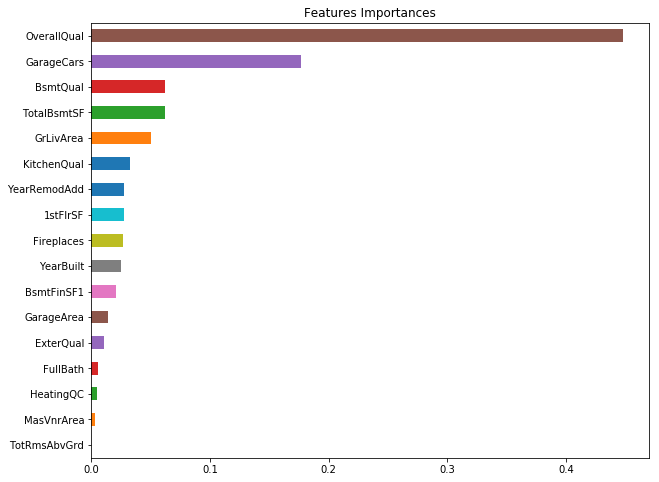

In [130]:
plt.figure(figsize=(10,8))
coef1 = pd.Series(xgb.feature_importances_, data.columns).sort_values(ascending=True)
coef1.plot(kind='barh', title='Features Importances')

In [131]:
# xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, 
#                    min_child_weight=1.7817, n_estimators = 3500, reg_alpha=0.4640, random_state=7)
xgb = XGBRegressor(learning_rate=0.05, reg_alpha=0.4640, random_state=3)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=3,
       reg_alpha=0.464, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [132]:
predictions = xgb.predict(X_train)

Text(0, 0.5, 'Prediction')

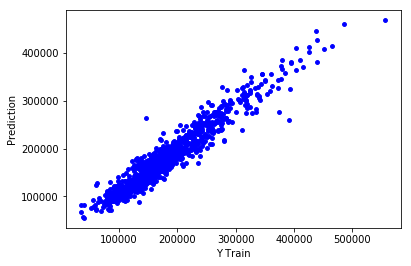

In [133]:
plt.scatter(y_train,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [134]:
predictions = xgb.predict(X_test)

Text(0, 0.5, 'Prediction')

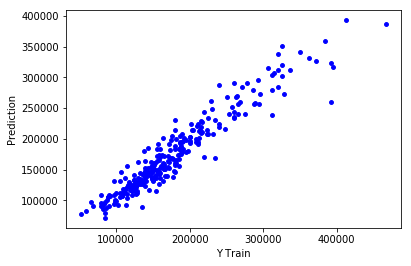

In [135]:
plt.scatter(y_test,predictions, c='blue', s=15)
plt.xlabel('Y Train')
plt.ylabel('Prediction')

In [145]:
df = data
df.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7       1710           2         548          856       856   
1            6       1262           2         460         1262      1262   
2            7       1786           2         608          920       920   
3            7       1717           3         642          756       961   
4            8       2198           3         836         1145      1145   

   FullBath  YearBuilt  YearRemodAdd  TotRmsAbvGrd  MasVnrArea  Fireplaces  \
0         2       2003          2003             8       196.0           0   
1         2       1976          1976             6         0.0           1   
2         2       2001          2002             6       162.0           1   
3         1       1915          1970             7         0.0           1   
4         2       2000          2000             9       350.0           1   

   BsmtFinSF1  KitchenQual  ExterQual  BsmtQual  HeatingQC  SalePrice  
0         706            2          2         2          0     208500  
1         978            3          3         2          0     181500  
2         486            2          2         2          0     223500  
3         216            2          3         4          2     140000  
4         655            2          2         2          0     250000

In [147]:
X_train.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7       1710           2         548          856       856   
2            7       1786           2         608          920       920   
3            7       1717           3         642          756       961   
4            8       2198           3         836         1145      1145   
5            5       1362           2         480          796       796   

   FullBath  YearBuilt  YearRemodAdd  TotRmsAbvGrd  MasVnrArea  Fireplaces  \
0         2       2003          2003             8       196.0           0   
2         2       2001          2002             6       162.0           1   
3         1       1915          1970             7         0.0           1   
4         2       2000          2000             9       350.0           1   
5         1       1993          1995             5         0.0           0   

   BsmtFinSF1  KitchenQual  ExterQual  BsmtQual  HeatingQC  
0         706            2          2         2          0  
2         486            2          2         2          0  
3         216            2          3         4          2  
4         655            2          2         2          0  
5         732            3          3         2          0

In [149]:
df.to_csv('dataUploadPredict.csv', index=False)

In [140]:
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=3,
       reg_alpha=0.464, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [139]:
pickle.dump(xgb, open('XGBRegressor_HousePricing.sav','wb'))